In [46]:
library(ArchR)
set.seed(1)
addArchRThreads(threads = 10)
addArchRGenome("mm10")
library(tidyverse)
library(here)

Setting default number of Parallel threads to 10.

BSgenome for mm10 not installed! Now installing by the following:
	BiocManager::install("BSgenome.Mmusculus.UCSC.mm10")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.12 (BiocManager 1.30.19), R 4.0.5 (2021-03-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'BSgenome.Mmusculus.UCSC.mm10'”
Old packages: 'bit', 'data.table', 'GenomicFeatures', 'ggpubr', 'mixsqp',
  'pbapply', 'pkgload', 'rsvg', 's2', 'shinyWidgets', 'slider',
  'spatstat.linnet', 'spData', 'systemPipeR', 'vctrs', 'xfun'

Setting default genome to Mm10.



In [ ]:
# # generate fragments file from Bam file using bap tool in command line
# bap-frag -i ~/CTRL/deconvoluted_data/final/alignments.possorted.tagged.bap.bam -be ~/CTRL/deconvoluted_data/final/alignments.possorted.tagged.barcodeTranslate.tsv  -c 8  -r mm10 -o ~/CTRL/frag_bap -z
# bap-frag -i ~/RA/deconvoluted_data/final/alignments.possorted.tagged.bap.bam -be ~/RA/deconvoluted_data/final/alignments.possorted.tagged.barcodeTranslate.tsv  -c 8  -r mm10 -o ~/RA/frag_bap -z

In [2]:
frag.files = c("~/CTRL/frag_bap/final/alignments.possorted.tagged.bap.fragments.tsv.gz","~/RA/frag_bap/final/alignments.possorted.tagged.bap.fragments.tsv.gz")

In [30]:
ArrowFiles <- createArrowFiles(inputFiles = frag.files,
                               sampleNames = c("CTRL","RA"),
                               filterTSS = 4, 
                               filterFrags = 1000,  
                               addTileMat = TRUE,
                               addGeneScoreMat = TRUE,
                               force = FALSE
                              )
ArrowFiles <- readRDS(file="./ArrowFiles.rds")

ArchR logging to : ArchRLogs/ArchR-addDoubletScores-3dbc545335ce-Date-2020-12-15_Time-12-50-23.log
If there is an issue, please report to github with logFile!

2020-12-15 12:50:23 : Batch Execution w/ safelapply!, 0 mins elapsed.

2020-12-15 12:50:23 : CTRL (1 of 2) :  Computing Doublet Statistics, 0 mins elapsed.

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

CTRL (1 of 2) : UMAP Projection R^2 = 0.84502

CTRL (1 of 2) : UMAP Projection R^2 = 0.84502



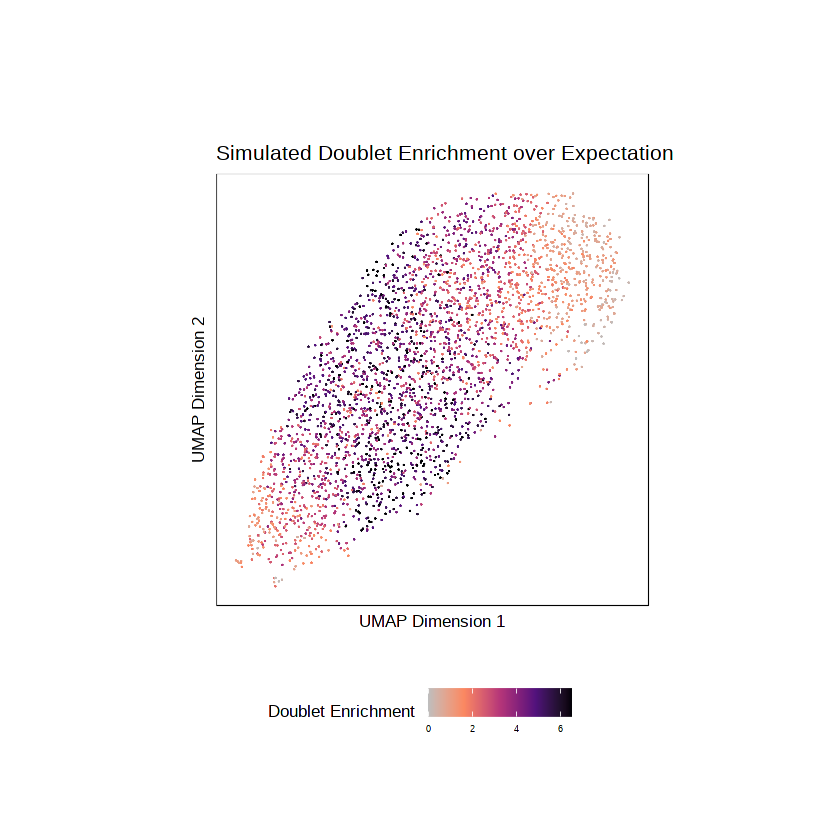

2020-12-15 12:51:55 : RA (2 of 2) :  Computing Doublet Statistics, 1.525 mins elapsed.

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

RA (2 of 2) : UMAP Projection R^2 = 0.6504

RA (2 of 2) : UMAP Projection R^2 = 0.6504

RA (2 of 2) : Correlation of UMAP Projection is below 0.9 (normally this is ~0.99)
This means there is little heterogeneity in your sample and thus doubletCalling is inaccurate.
force = FALSE, thus returning -1 doubletScores and doubletEnrichments!
Set force = TRUE if you want to continue (not recommended).

RA (2 of 2) : Correlation of UMAP Projection is below 0.9 (normally this is ~0.99)
This means there is little heterogeneity in your sample and thus doubletCalling is inaccurate.
force = FALSE, thus returning -1 doubletScores and doubletEnrichments!
Set force = TRUE if you want to continue (not recommended).

ArchR logging successful to : ArchRLogs/ArchR-addDoubletScores-3dbc545335ce-Date-2020-12-15_Time-12-50-23.log

Using GeneAnnotation set by addArchRG

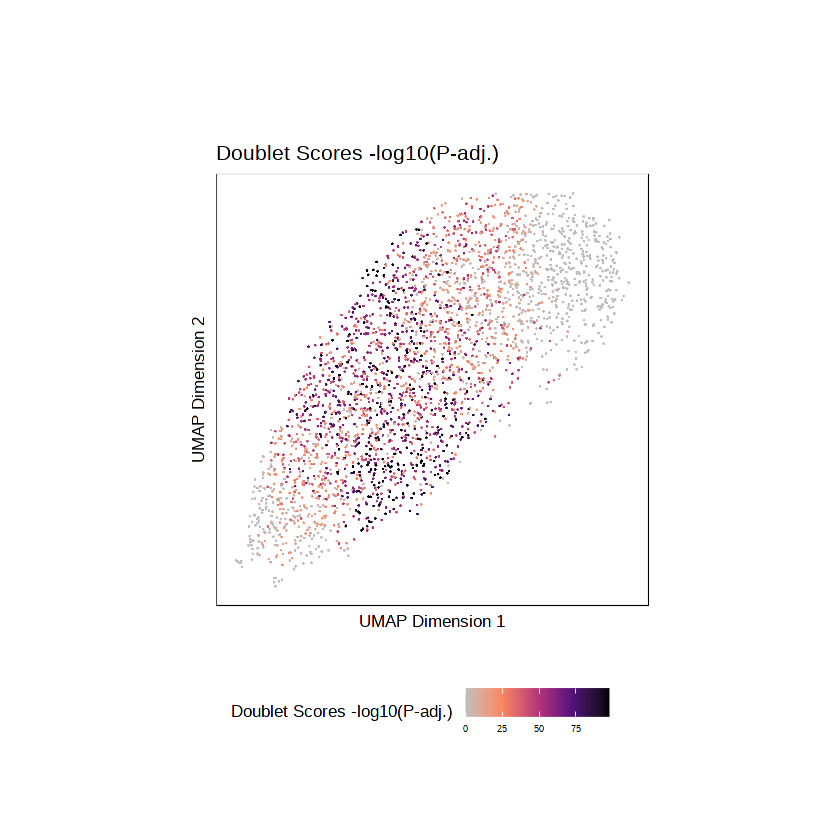

In [34]:
doubScores <- addDoubletScores(
    input = ArrowFiles,
    k = 10, #Refers to how many cells near a "pseudo-doublet" to count.
    knnMethod = "UMAP", #Refers to the embedding to use for nearest neighbor search with doublet projection.
    LSIMethod = 1
)
Merged.proj <- ArchRProject(
  ArrowFiles = ArrowFiles, 
  outputDirectory = "CTRL.RA.merged",
  copyArrows = TRUE #This is recommened so that if you modify the Arrow files you have an original copy for later usage.
)

saveArchRProject(ArchRProj = Merged.proj, outputDirectory = "/CTRL.RA.merged", load = FALSE)

## UMAP and Clustering

In [102]:
Merged.proj2 <- addIterativeLSI(
    ArchRProj = Merged.proj2,
    useMatrix = "TileMatrix", 
    name = "IterativeLSI", 
    iterations = 3, 
    clusterParams = list( #See Seurat::FindClusters
        resolution = c(1.5), 
        sampleCells = 10000, 
        n.start = 10,
        algorithm=2
    ), 
    varFeatures = 100000, 
    dimsToUse = 1:30,
    force = FALSE
)

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-e46928a64bd7-Date-2022-09-08_Time-00-08-06.log
If there is an issue, please report to github with logFile!

2022-09-08 00:08:07 : Computing Total Across All Features, 0.005 mins elapsed.

2022-09-08 00:08:09 : Computing Top Features, 0.035 mins elapsed.

###########
2022-09-08 00:08:12 : Running LSI (1 of 3) on Top Features, 0.088 mins elapsed.
###########

2022-09-08 00:08:12 : Creating Partial Matrix, 0.089 mins elapsed.

2022-09-08 00:08:27 : Computing LSI, 0.342 mins elapsed.

2022-09-08 00:10:08 : Identifying Clusters, 2.025 mins elapsed.

2022-09-08 00:10:19 : Identified 11 Clusters, 2.213 mins elapsed.

2022-09-08 00:10:19 : Saving LSI Iteration, 2.214 mins elapsed.



2022-09-08 00:10:35 : Creating Cluster Matrix on the total Group Features, 2.479 mins elapsed.

2022-09-08 00:10:51 : Computing Variable Features, 2.733 mins elapsed.

###########
2022-09-08 00:10:51 : Running LSI (2 of 3) on Variable Features,

In [103]:
Merged.proj2 <- addUMAP(
    ArchRProj = Merged.proj2, 
    reducedDims = "IterativeLSI", 
    name = "UMAP", 
    nNeighbors = 30, 
    minDist = 0.5, 
    metric = "cosine",
    force = FALSE
)

00:15:35 UMAP embedding parameters a = 0.583 b = 1.334

00:15:35 Read 4144 rows and found 30 numeric columns

00:15:35 Using Annoy for neighbor search, n_neighbors = 30

00:15:35 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

00:15:36 Writing NN index file to temp file /tmp/Rtmp640BHT/filee46930c7abb5

00:15:36 Searching Annoy index using 32 threads, search_k = 3000

00:15:36 Annoy recall = 100%

00:15:38 Commencing smooth kNN distance calibration using 32 threads
 with target n_neighbors = 30

00:15:39 Initializing from normalized Laplacian + noise (using irlba)

00:15:40 Commencing optimization for 500 epochs, with 216254 positive edges

00:15:56 Optimization finished

00:15:56 Creating temp model dir /tmp/Rtmp640BHT/dire469643795bc

00:15:56 Creating dir /tmp/Rtmp6

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-ea6131111e4e-Date-2022-11-09_Time-18-33-09.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 

2 

3 

4 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-ea6131111e4e-Date-2022-11-09_Time-18-33-09.log



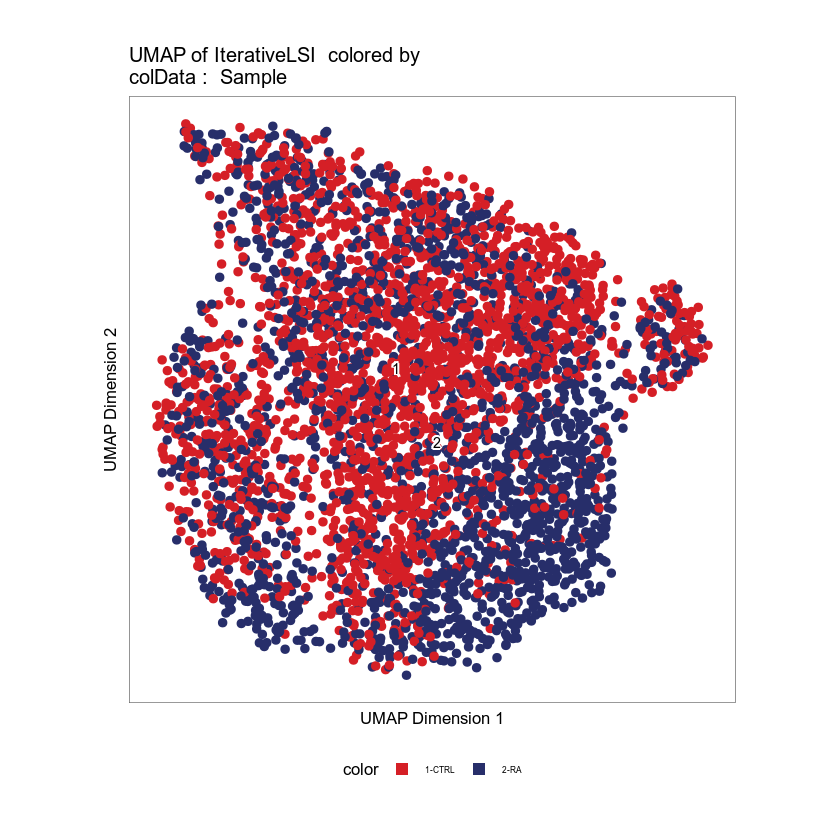

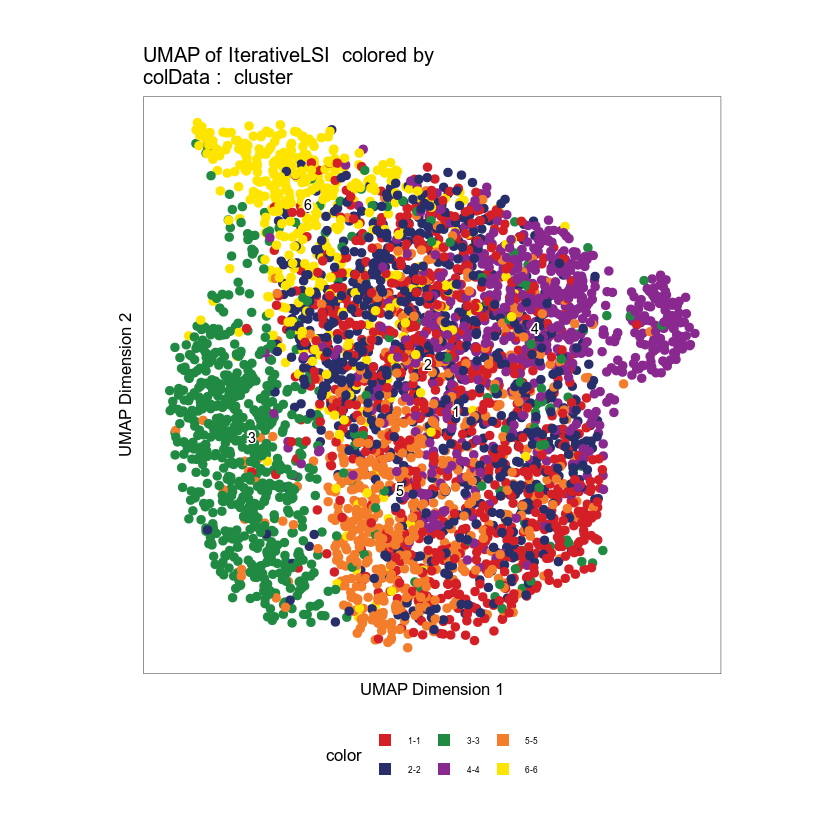

$Sample

$cluster

$Seurat.Clusters

$Harmony.Clusters


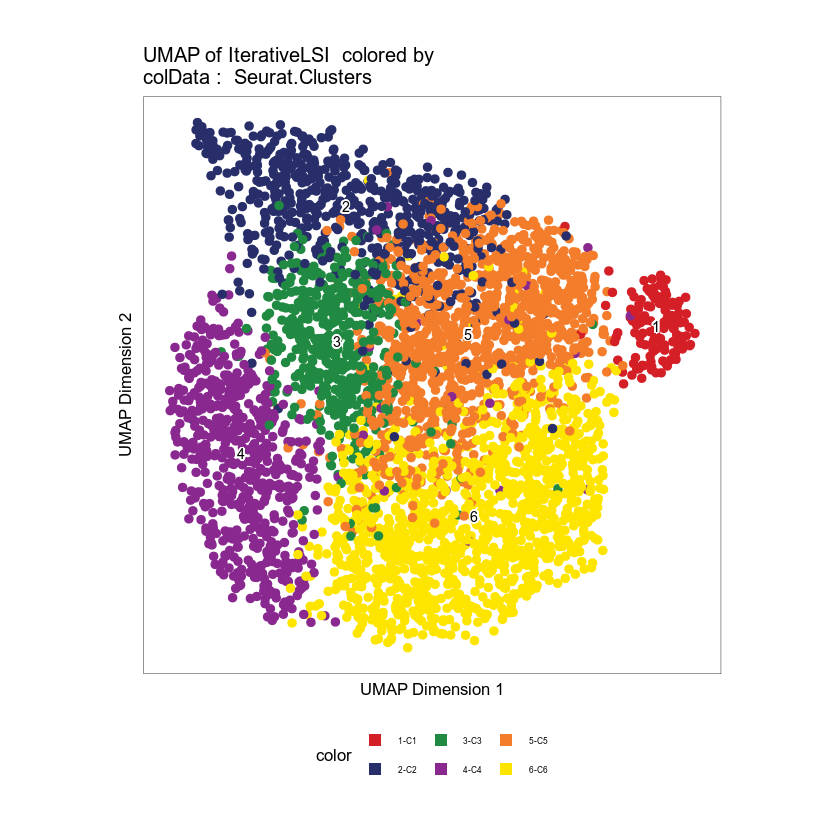

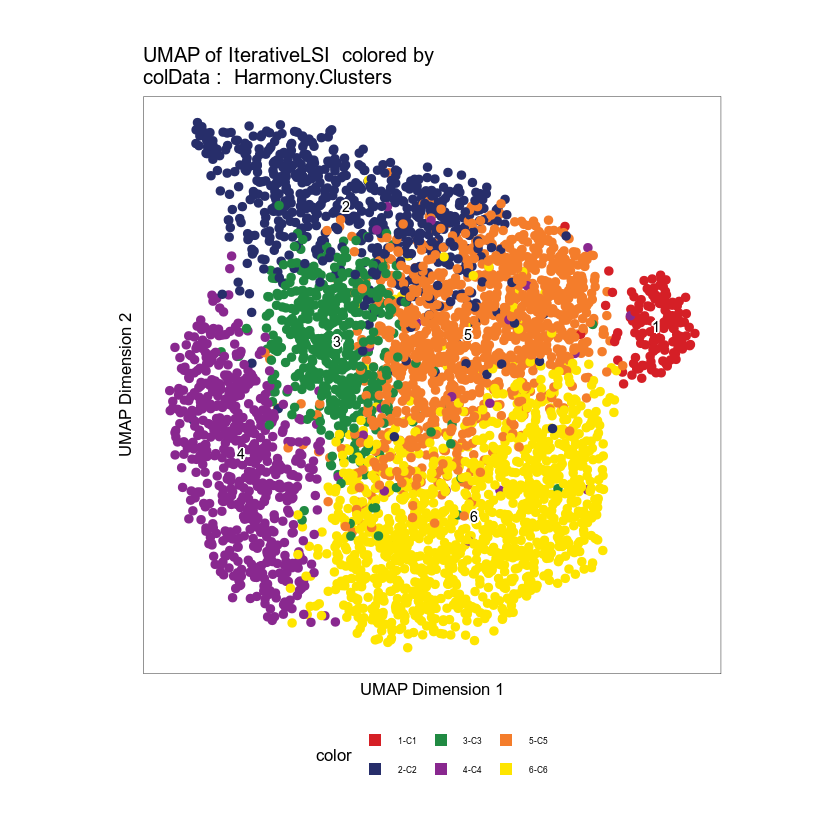

In [53]:
p <- plotEmbedding(ArchRProj = Merged.proj2,
                   embedding = "UMAP", 
                   colorBy = "cellColData", 
                   name = c("Sample","cluster" , "Seurat.Clusters", "Harmony.Clusters"), 
                   size =2)
p

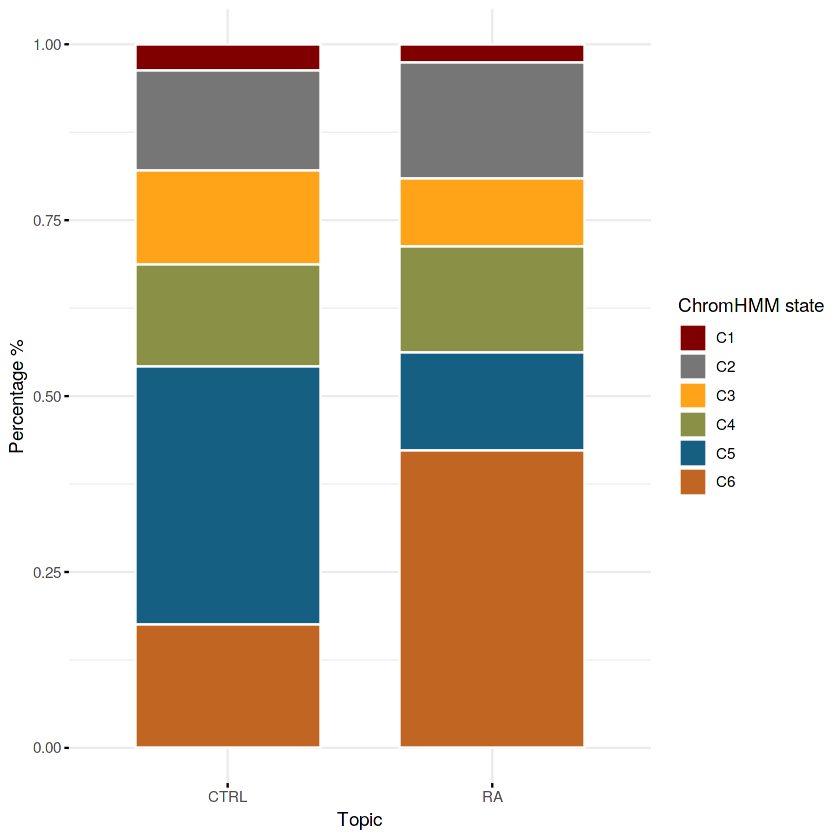

In [35]:
# library(ggpubr)
p <- ggbarplot(perc, y="Freq", x="group",fill = "Var1",
                  # change fill color by mpg_level
         order = c("CTRL","RA"),
          color = "white",            # Set bar border colors to white
          palette = "uchicago",
          position = position_fill() ,# jco journal color palett. see ?ggpar
#           sort.val = "desc",          # Sort the value in descending order
          sort.by.groups = FALSE,     # Don't sort inside each group
#           x.text.angle = 90,          # Rotate vertically x axis texts
          xlab = "Topic",
          ylab = "Percentage %",
          legend.title = "ChromHMM state",
          lab.size = 25,
          rotate = FALSE,
          ggtheme = theme_minimal())
p

## Peak calling and motif activity calculation

In [109]:
pathToMacs2 <- findMacs2()
Merged.proj2 <- addReproduciblePeakSet(
    ArchRProj = Merged.proj2, 
    groupBy = "Seurat.Clusters", 
    pathToMacs2 = pathToMacs2
)

Searching For MACS2..

Found with $path!

ArchR logging to : ArchRLogs/ArchR-addReproduciblePeakSet-3dbc4b7fd02c-Date-2020-12-15_Time-17-19-34.log
If there is an issue, please report to github with logFile!

Calling Peaks with Macs2

2020-12-15 17:19:34 : Peak Calling Parameters!, 0.004 mins elapsed.



   Group nCells nCellsUsed nReplicates nMin nMax maxPeaks
C1    C1    134        134           2   52   82    67000
C2    C2    633        633           2  310  323   150000
C3    C3    483        483           2  191  292   150000
C4    C4    612        612           2  297  315   150000
C5    C5   1076        776           2  276  500   150000
C6    C6   1218        884           2  384  500   150000


2020-12-15 17:19:34 : Batching Peak Calls!, 0.004 mins elapsed.

2020-12-15 17:19:34 : Batch Execution w/ safelapply!, 0 mins elapsed.

2020-12-15 17:19:34 : Group 1 of 12, Calling Peaks with MACS2!, 0 mins elapsed.

Running Macs2 with Params : macs2 callpeak -g 1.87e+09 --name C1._.CTRL-1 --treatment /home/leetl/CTRLvsRA-scATAC/CTRL.RA.merged.harmony/PeakCalls/InsertionBeds/C1._.CTRL-1.insertions.bed --outdir /home/leetl/CTRLvsRA-scATAC/CTRL.RA.merged.harmony/PeakCalls/InsertionBeds --format BED --call-summits --keep-dup all --nomodel --nolambda --shift -75 --extsize 150 -q 0.1

2020-12-15 17:20:09 : Group 2 of 12, Calling Peaks with MACS2!, 0.572 mins elapsed.

Running Macs2 with Params : macs2 callpeak -g 1.87e+09 --name C1._.RA-2 --treatment /home/leetl/CTRLvsRA-scATAC/CTRL.RA.merged.harmony/PeakCalls/InsertionBeds/C1._.RA-2.insertions.bed --outdir /home/leetl/CTRLvsRA-scATAC/CTRL.RA.merged.harmony/PeakCalls/InsertionBeds --format BED --call-summits --keep-dup all --nomodel --nolam

[1] "/home/leetl/CTRLvsRA-scATAC/CTRL.RA.merged.harmony/PeakCalls/C1-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/home/leetl/CTRLvsRA-scATAC/CTRL.RA.merged.harmony/PeakCalls/C2-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/home/leetl/CTRLvsRA-scATAC/CTRL.RA.merged.harmony/PeakCalls/C3-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/home/leetl/CTRLvsRA-scATAC/CTRL.RA.merged.harmony/PeakCalls/C4-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/home/leetl/CTRLvsRA-scATAC/CTRL.RA.merged.harmony/PeakCalls/C5-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/home/leetl/CTRLvsRA-scATAC/CTRL.RA.merged.harmony/PeakCalls/C6-reproduciblePeaks.gr.rds"


2020-12-15 17:33:51 : Creating Union Peak Set!, 14.281 mins elapsed.

Converged after 6 iterations!

Plotting Ggplot!

2020-12-15 17:33:54 : Finished Creating Union Peak Set (112292)!, 14.327 mins elapsed.



In [108]:
Merged.proj2 <- addGroupCoverages(ArchRProj = Merged.proj2, groupBy = "Seurat.Clusters")

ArchR logging to : ArchRLogs/ArchR-addGroupCoverages-3dbc5ecf02e9-Date-2020-12-15_Time-17-13-08.log
If there is an issue, please report to github with logFile!

C1 (1 of 6) : CellGroups N = 2

C2 (2 of 6) : CellGroups N = 2

C3 (3 of 6) : CellGroups N = 2

C4 (4 of 6) : CellGroups N = 2

C5 (5 of 6) : CellGroups N = 2

C6 (6 of 6) : CellGroups N = 2

2020-12-15 17:13:09 : Creating Coverage Files!, 0.009 mins elapsed.

2020-12-15 17:13:09 : Batch Execution w/ safelapply!, 0.009 mins elapsed.

2020-12-15 17:13:09 : Group C1._.CTRL (1 of 12) : Creating Group Coverage File : C1._.CTRL.insertions.coverage.h5, 0.009 mins elapsed.

Number of Cells = 82

Coverage File Exists!

Added Coverage Group

Added Metadata Group

Added ArrowCoverage Class

Added Coverage/Info

Added Coverage/Info/CellNames

2020-12-15 17:13:24 : Group C1._.RA (2 of 12) : Creating Group Coverage File : C1._.RA.insertions.coverage.h5, 0.252 mins elapsed.

Number of Cells = 52

Coverage File Exists!

Added Coverage Group



Coverage File chr18 (10 of 12)

Coverage File chr18 (11 of 12)

Coverage File chr18 (12 of 12)

Kmer Bias chr19 (11 of 21)

chr19 
Coverage File chr19 (1 of 12)

Coverage File chr19 (2 of 12)

Coverage File chr19 (3 of 12)

Coverage File chr19 (4 of 12)

Coverage File chr19 (5 of 12)

Coverage File chr19 (6 of 12)

Coverage File chr19 (7 of 12)

Coverage File chr19 (8 of 12)

Coverage File chr19 (9 of 12)

Coverage File chr19 (10 of 12)

Coverage File chr19 (11 of 12)

Coverage File chr19 (12 of 12)

Kmer Bias chr2 (12 of 21)

chr2 
Coverage File chr2 (1 of 12)

Coverage File chr2 (2 of 12)

Coverage File chr2 (3 of 12)

Coverage File chr2 (4 of 12)

Coverage File chr2 (5 of 12)

Coverage File chr2 (6 of 12)

Coverage File chr2 (7 of 12)

Coverage File chr2 (8 of 12)

Coverage File chr2 (9 of 12)

Coverage File chr2 (10 of 12)

Coverage File chr2 (11 of 12)

Coverage File chr2 (12 of 12)

Kmer Bias chr3 (13 of 21)

chr3 
Coverage File chr3 (1 of 12)

Coverage File chr3 (2 of 12)

Cover

In [110]:
Merged.proj2 <- addPeakMatrix(Merged.proj2)

ArchR logging to : ArchRLogs/ArchR-addPeakMatrix-3dbc6ed33280-Date-2020-12-15_Time-17-33-54.log
If there is an issue, please report to github with logFile!

2020-12-15 17:33:54 : Batch Execution w/ safelapply!, 0 mins elapsed.

2020-12-15 17:33:54 : Adding CTRL to PeakMatrix for Chr (1 of 20)!, 0.006 mins elapsed.

2020-12-15 17:33:57 : Adding CTRL to PeakMatrix for Chr (2 of 20)!, 0.044 mins elapsed.

2020-12-15 17:33:59 : Adding CTRL to PeakMatrix for Chr (3 of 20)!, 0.086 mins elapsed.

2020-12-15 17:34:01 : Adding CTRL to PeakMatrix for Chr (4 of 20)!, 0.117 mins elapsed.

2020-12-15 17:34:03 : Adding CTRL to PeakMatrix for Chr (5 of 20)!, 0.151 mins elapsed.

2020-12-15 17:34:05 : Adding CTRL to PeakMatrix for Chr (6 of 20)!, 0.184 mins elapsed.

2020-12-15 17:34:07 : Adding CTRL to PeakMatrix for Chr (7 of 20)!, 0.215 mins elapsed.

2020-12-15 17:34:09 : Adding CTRL to PeakMatrix for Chr (8 of 20)!, 0.249 mins elapsed.

2020-12-15 17:34:11 : Adding CTRL to PeakMatrix for Chr (9 o

In [78]:
Merged.proj2 <- addBgdPeaks(Merged.proj2,force = TRUE)

Identifying Background Peaks!

Error: package or namespace load failed for ‘chromVAR’ in dyn.load(file, DLLpath = DLLpath, ...):
 unable to load shared object '/lustre/home/jasonliao/miniconda3/envs/seurat/lib/R/library/rtracklayer/libs/rtracklayer.so':
  libssl.so.1.1: cannot open shared object file: No such file or directory

Error with chromVAR::getBackgroundPeaks! Handling this with a safer method for getting background peaks with ArchR!



In [112]:
Merged.proj2 <- addMotifAnnotations(ArchRProj = Merged.proj2, motifSet = "cisbp", name = "Motif",force = TRUE)
Merged.proj2 <- addBgdPeaks(Merged.proj2)

No methods found in package ‘IRanges’ for request: ‘score’ when loading ‘TFBSTools’

ArchR logging to : ArchRLogs/ArchR-addMotifAnnotations-3dbc42db1866-Date-2020-12-15_Time-17-37-16.log
If there is an issue, please report to github with logFile!

2020-12-15 17:37:18 : Gettting Motif Set, Species : Mus musculus, 0.002 mins elapsed.

Using version 2 motifs!

2020-12-15 17:37:20 : Finding Motif Positions with motifmatchr!, 0.038 mins elapsed.

2020-12-15 17:38:46 : Creating Motif Overlap Matrix, 1.474 mins elapsed.

2020-12-15 17:38:48 : Finished Getting Motif Info!, 1.509 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addMotifAnnotations-3dbc42db1866-Date-2020-12-15_Time-17-37-16.log

Identifying Background Peaks!



In [113]:
Merged.proj.LC <- addDeviationsMatrix(
  ArchRProj = Merged.proj2, 
  peakAnnotation = "Motif",
  force = TRUE
)

Using Previous Background Peaks!

ArchR logging to : ArchRLogs/ArchR-addDeviationsMatrix-3dbc58017198-Date-2020-12-15_Time-17-38-55.log
If there is an issue, please report to github with logFile!



NULL


2020-12-15 17:38:57 : Batch Execution w/ safelapply!, 0 mins elapsed.

2020-12-15 17:38:57 : chromVAR deviations CTRL (1 of 2) Schep (2017), 0.014 mins elapsed.

2020-12-15 17:39:23 : CTRL (1 of 2) : Deviations for Annotation 44 of 884, 0.335 mins elapsed.

2020-12-15 17:39:44 : CTRL (1 of 2) : Deviations for Annotation 88 of 884, 0.677 mins elapsed.

2020-12-15 17:40:02 : CTRL (1 of 2) : Deviations for Annotation 132 of 884, 0.977 mins elapsed.

2020-12-15 17:40:28 : CTRL (1 of 2) : Deviations for Annotation 176 of 884, 1.417 mins elapsed.

2020-12-15 17:40:55 : CTRL (1 of 2) : Deviations for Annotation 220 of 884, 1.858 mins elapsed.

2020-12-15 17:41:18 : CTRL (1 of 2) : Deviations for Annotation 264 of 884, 2.254 mins elapsed.

2020-12-15 17:41:44 : CTRL (1 of 2) : Deviations for Annotation 308 of 884, 2.681 mins elapsed.

2020-12-15 17:42:10 : CTRL (1 of 2) : Deviations for Annotation 352 of 884, 3.107 mins elapsed.

2020-12-15 17:42:34 : CTRL (1 of 2) : Deviations for Annotation 

In [143]:
CTRL_RA_archr_peakset <- getPeakSet(Merged.proj2)
Merged.proj2 <- addPeakMatrix(Merged.proj2)
Merged.proj2@cellColData$cluster <- as.character(Merged.proj2@cellColData$cluster)

ArchR logging to : ArchRLogs/ArchR-addPeakMatrix-4d1144b470e7-Date-2021-02-28_Time-23-15-11.log
If there is an issue, please report to github with logFile!

2021-02-28 23:15:11 : Batch Execution w/ safelapply!, 0 mins elapsed.

.createArrowGroup : Arrow Group already exists! Dropping Group from ArrowFile! This will take ~10-30 seconds!

.dropGroupsFromArrow : Initializing Temp ArrowFile

.dropGroupsFromArrow : Adding Metadata to Temp ArrowFile

.dropGroupsFromArrow : Adding SubGroups to Temp ArrowFile

.dropGroupsFromArrow : Move Temp ArrowFile to ArrowFile

2021-02-28 23:15:19 : Adding CTRL to PeakMatrix for Chr (1 of 20)!, 0.005 mins elapsed.

2021-02-28 23:15:21 : Adding CTRL to PeakMatrix for Chr (2 of 20)!, 0.04 mins elapsed.

2021-02-28 23:15:24 : Adding CTRL to PeakMatrix for Chr (3 of 20)!, 0.082 mins elapsed.

2021-02-28 23:15:25 : Adding CTRL to PeakMatrix for Chr (4 of 20)!, 0.112 mins elapsed.

2021-02-28 23:15:27 : Adding CTRL to PeakMatrix for Chr (5 of 20)!, 0.147 mins e

In [ ]:
library(rtracklayer)
export(CTRL_RA_archr_peakset,"CTRL_RA_archr_peakset_2021.bed")

In [140]:
PeakMatrix <- getMatrixFromProject(
  ArchRProj = Merged.proj2,
  useMatrix = "PeakMatrix",
  useSeqnames = NULL,
  verbose = TRUE,
  binarize = FALSE,
  threads = getArchRThreads(),
  logFile = createLogFile("getMatrixFromProject")
)


ArchR logging to : ArchRLogs/ArchR-getMatrixFromProject-4d1142ff192c-Date-2021-02-28_Time-23-11-12.log
If there is an issue, please report to github with logFile!

2021-02-28 23:11:25 : Organizing colData, 0.214 mins elapsed.

2021-02-28 23:11:25 : Organizing rowData, 0.214 mins elapsed.

2021-02-28 23:11:25 : Organizing rowRanges, 0.214 mins elapsed.

2021-02-28 23:11:25 : Organizing Assays (1 of 1), 0.214 mins elapsed.

2021-02-28 23:11:25 : Constructing SummarizedExperiment, 0.219 mins elapsed.

2021-02-28 23:11:26 : Finished Matrix Creation, 0.23 mins elapsed.



In [74]:
df <- data.frame(seqnames=seqnames(CTRL_RA_archr_peakset),
  starts=start(CTRL_RA_archr_peakset),
  ends=end(CTRL_RA_archr_peakset))
peakname <- df %>% unite(position,starts:ends,sep="-") %>% unite(name,seqnames:position,sep=":")

In [76]:
library(DropletUtils)
row.names(peak_mtx) <- peakname$name
colnames(peak_mtx) <- rownames(colData(PeakMatrix))
write10xCounts(x = peak_mtx, path = "./CTRL_RA_archr_peakmatrix/")
saveRDS(peak_mtx,file="./CTRL_RA_archr_peakmatrix.rds")

## Marker gene and marker peak identification

In [ ]:
## Pseudobulk DEG analysis
markersGS_bulk <- getMarkerFeatures(
    ArchRProj = Merged.proj2, 
    useMatrix = "GeneScoreMatrix", 
    maxCells = 5000,
groupBy = "Sample",
    useGroups = "RA",
#     bgdGroups = "CTRL",
    k=200,
    bias = c("TSSEnrichment", "log10(nFrags)"),
    testMethod = "wilcoxon"
)

In [114]:
# pdf("Bulk_comparison_DEG_heatmap.pdf")
markerGenes  <- c(
    "Gfra1","Zbtb16","Stra8" #TCells
  )

plotMarkerHeatmap <- markerHeatmap(
  seMarker = markersGS_bulk, 
  cutOff = "FDR <= 0.1 & Log2FC >= 0", 
#   labelMarkers = markerGenes,
  transpose = TRUE,
    plotLog2FC = TRUE
)
# dev.off()

Warning message:
“'markerHeatmap' is deprecated.
Use 'plotMarkerHeatmap' instead.
See help("Deprecated")”
ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-74f92e92a402-Date-2021-10-12_Time-14-48-52.log
If there is an issue, please report to github with logFile!

Printing Top Marker Genes:

CTRL:

	4933415F23Rik, Kansl3, Cnnm4, Actr1b, 4933424G06Rik, Zap70, Tmem131, Inpp4a, 2010300C02Rik, Aff3, Lonrf2, Tbc1d8, Rnf149, Slc9a4, Pgap1

RA:

	Xkr4, Oprk1, Rb1cc1, Alkal1, St18, Pcmtd1, Sntg1, 2610203C22Rik, Cpa6, Prex2, A830018L16Rik, Mir6341, Sulf1, Xkr9, Gm5523

Identified 6225 markers!



 [1] "4933415F23Rik" "Kansl3"        "Cnnm4"         "Actr1b"       
 [5] "4933424G06Rik" "Zap70"         "Tmem131"       "Inpp4a"       
 [9] "2010300C02Rik" "Aff3"          "Lonrf2"        "Tbc1d8"       
[13] "Rnf149"        "Slc9a4"        "Pgap1"         "Xkr4"         
[17] "Oprk1"         "Rb1cc1"        "Alkal1"        "St18"         
[21] "Pcmtd1"        "Sntg1"         "2610203C22Rik" "Cpa6"         
[25] "Prex2"         "A830018L16Rik" "Mir6341"       "Sulf1"        
[29] "Xkr9"          "Gm5523"       


Adding Annotations..

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-74f92e92a402-Date-2021-10-12_Time-14-48-52.log



In [139]:
res <- getMarkers(markersGS_bulk, 
                  cutOff = "FDR <= 1"
                 ) %>% as.data.frame %>% mutate(log2FoldChange= as.numeric(Log2FC), pvalue = FDR ) 
# library(EnhancedVolcano)

In [198]:
pdf("CTRL_vs_RA_pseudobulk_markergene_DEG.pdf")
## Redo vocanal plot
res <- getMarkers(markersGS_bulk, 
                  cutOff = "FDR <= 1"
                 ) %>% as.data.frame %>% mutate(log2FoldChange= as.numeric(Log2FC), pvalue = FDR )
rownames(res) <- res$name
EnhancedVolcano(res,
                xlim = c(-1.5,1.5),
                ylim = c(0,20),
    x = 'log2FoldChange',
    y = 'pvalue',
    title = 'RA versus CTRL',
    pCutoff = 0.05,
    FCcutoff = 0.1,
    pointSize = 1.0,
    labSize = 6.0,
 lab = rownames(res),
               selectLab = c('Zbtb16','Stra8',"Gfra1","Rarb","Nrg3"),
               drawConnectors = TRUE,
    widthConnectors = 0.75)
dev.off()

png 
  2

In [61]:
Merged.proj2@cellColData$sample_cluster <- paste0(Merged.proj2@cellColData$Sample,"_",Merged.proj2@cellColData$Seurat.Clusters)
markersPeaks_bulk <- getMarkerFeatures(
    ArchRProj = Merged.proj2, 
    useMatrix = "PeakMatrix", maxCells = 5000,
    k = 500,
#     bgdGroups = "CTRL",
#        useGroups = "RA",
    groupBy = "Sample",
#   bias = c("TSSEnrichment", "log10(nFrags)"),
  testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-67c7386926b7-Date-2022-11-18_Time-09-28-04.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Integer.Matrix

2022-11-18 09:28:05 : Matching Known Biases, 0.004 mins elapsed.

###########
2022-11-18 09:28:39 : Completed Pairwise Tests, 0.57 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-67c7386926b7-Date-2022-11-18_Time-09-28-04.log



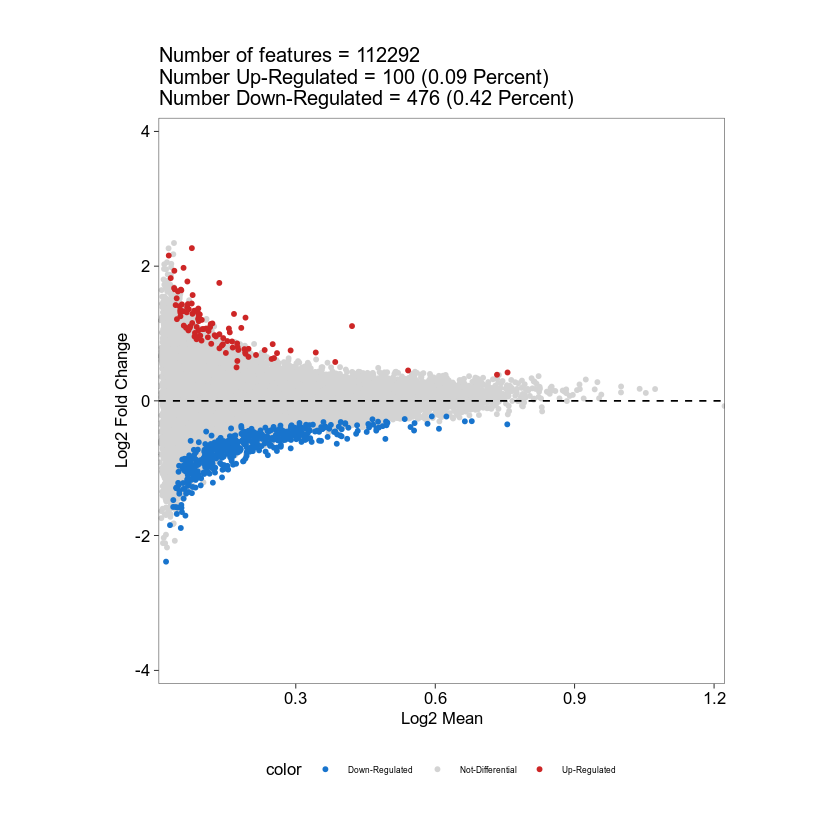

In [62]:
plotMarkers(seMarker = markersPeaks_bulk, name = "RA", plotAs = "MA",cutOff = "FDR <= 0.1 ")


In [63]:
pdf("bulk_marker_peaks.pdf")
plotMarkers(seMarker = markersPeaks_bulk, name = "RA", plotAs = "MA",cutOff = "FDR <= 0.1 ")
dev.off()

png 
  2

In [66]:
getMarkers(markersPeaks_bulk, cutOff = "FDR <= 0.1", returnGR = FALSE)$RA %>% as.data.frame  %>% 
write.table("./Pseudobulk.markerpeaks.txt",sep = "\t",quote = FALSE)

# Visulization

Getting ImputeWeights

Getting Matrix Values...

2022-09-02 00:20:45 : 



ArchR logging to : ArchRLogs/ArchR-imputeMatrix-e46919678dc8-Date-2022-09-02_Time-00-20-52.log
If there is an issue, please report to github with logFile!

Using weights on disk

1 of 1

1 
2 
3 
4 
5 
6 


Picking joint bandwidth of 0.0157

Picking joint bandwidth of 0.0138



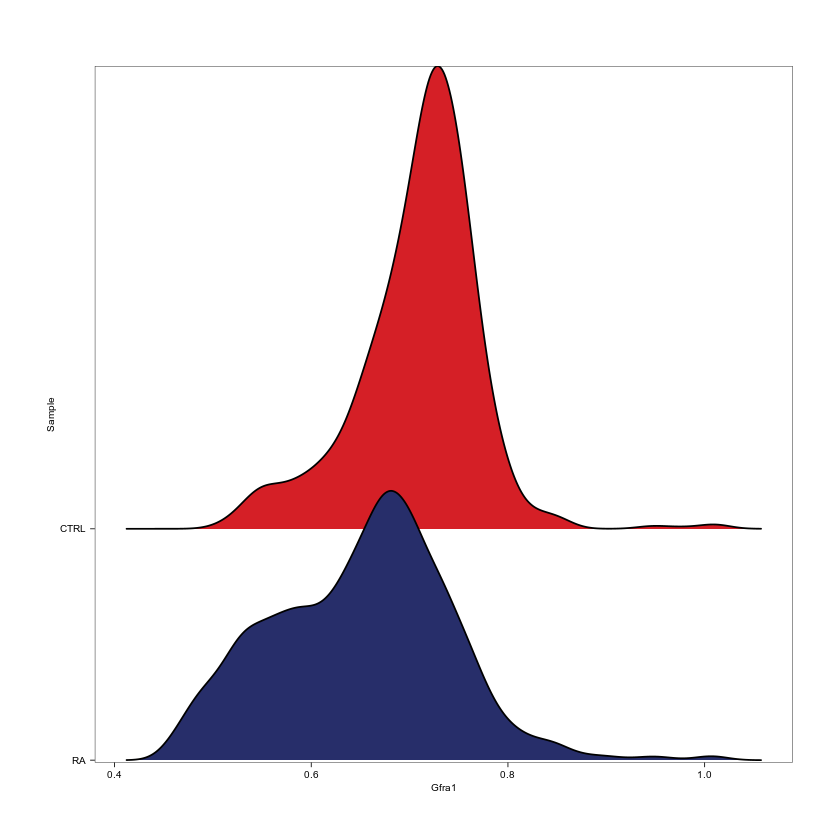

Picking joint bandwidth of 0.00612



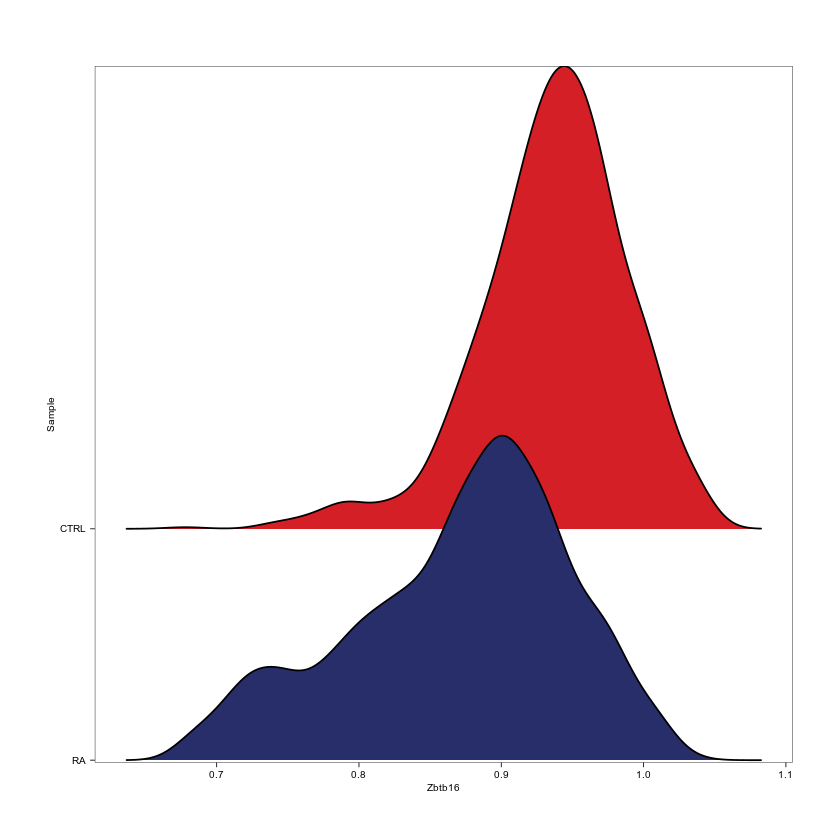

Picking joint bandwidth of 0.0463



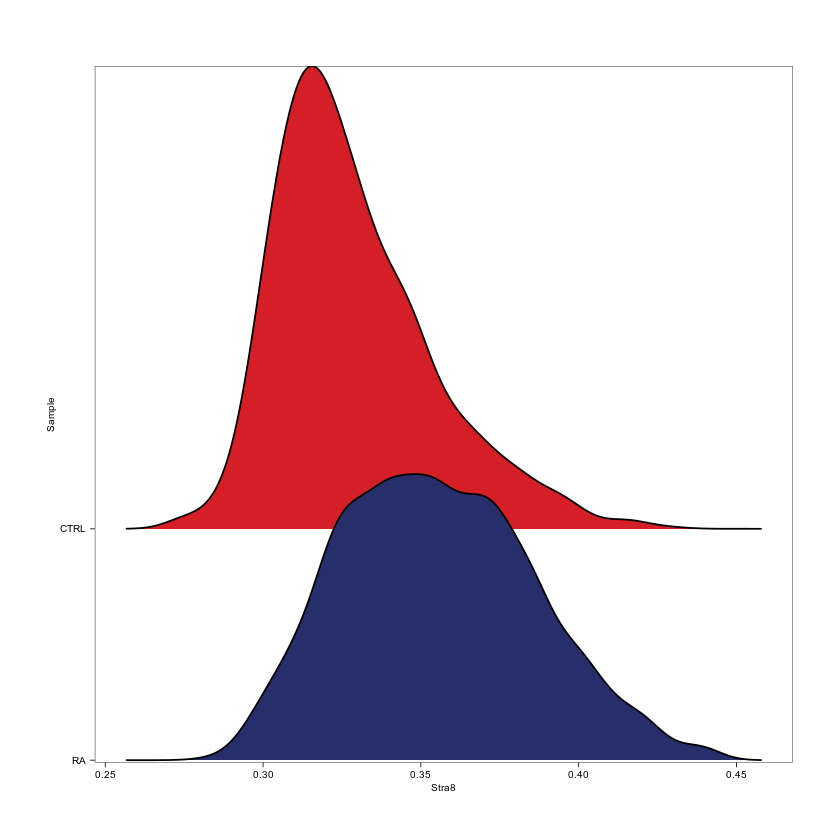

Picking joint bandwidth of 0.0257



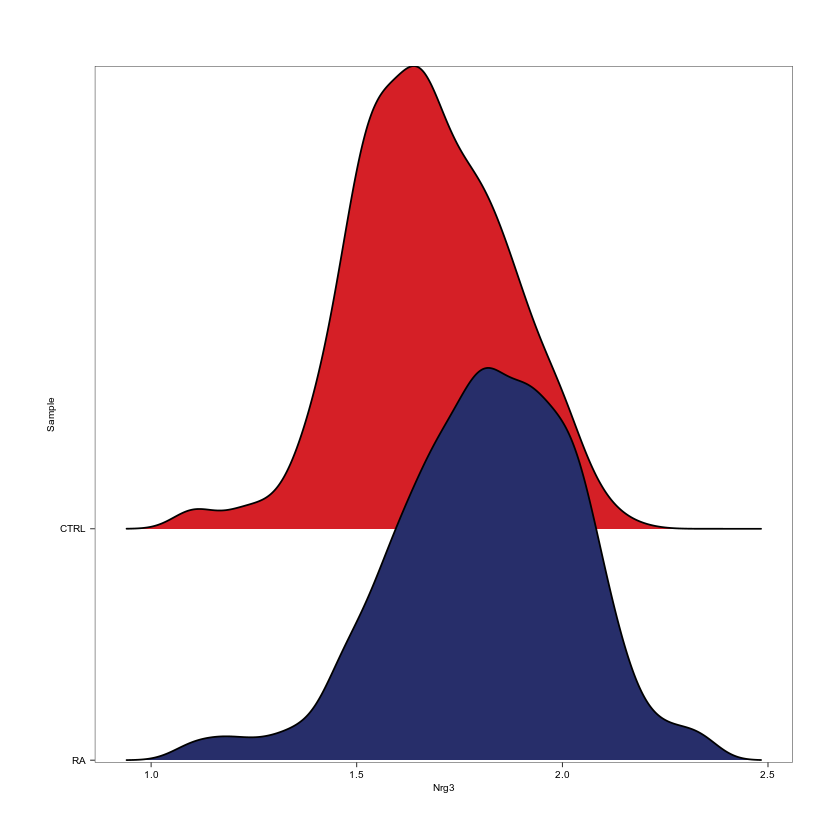

Picking joint bandwidth of 0.0069



$Gfra1

$Zbtb16

$Stra8

$Nrg3

$Rarb

$Kit


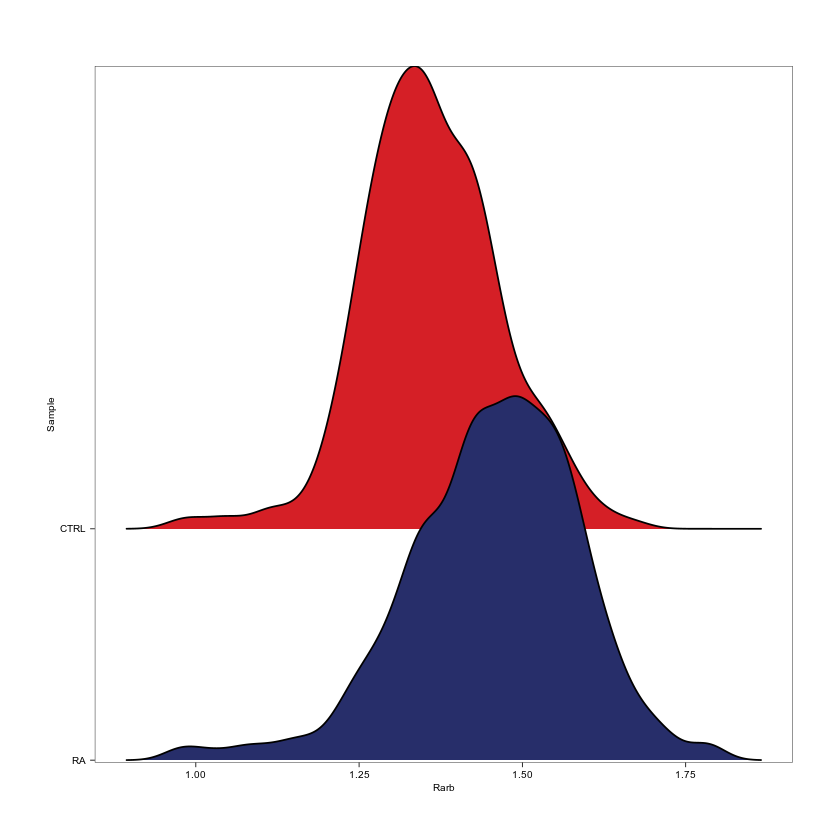

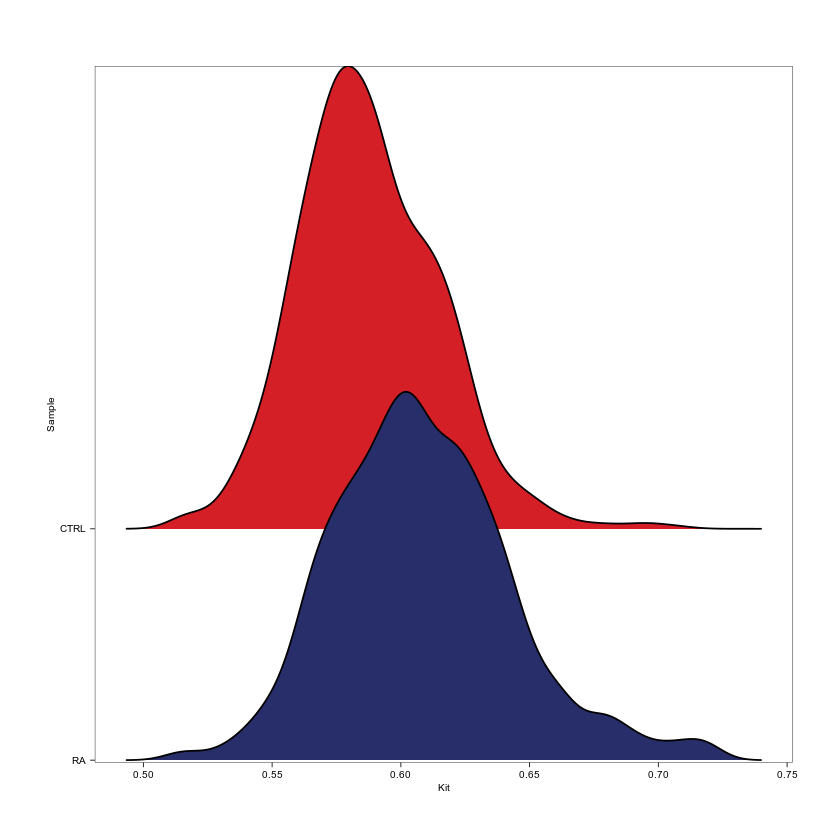

In [54]:
p3 <- plotGroups(
    ArchRProj = Merged.proj2, 
    groupBy = "Sample", 
    colorBy = "GeneScoreMatrix", 
    name = c("Gfra1", "Zbtb16", "Stra8", "Nrg3","Rarb","Kit"),
    plotAs = "ridges"
   )

p3

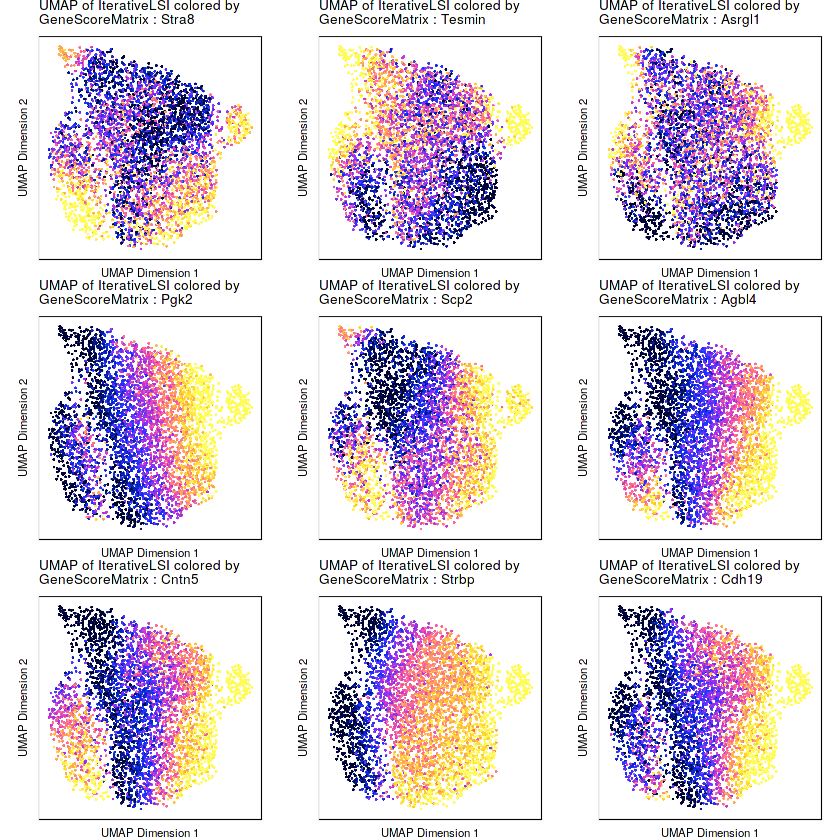

In [93]:
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

In [214]:
plotPDF(p3, name = "RA.gene.ridge.pdf", width = 3, height = 5)
# dev.off()

Plotting Ggplot!

Picking joint bandwidth of 0.0149

Picking joint bandwidth of 0.0149

Plotting Ggplot!

Picking joint bandwidth of 0.0108

Picking joint bandwidth of 0.0108

Plotting Ggplot!

Picking joint bandwidth of 0.00527

Picking joint bandwidth of 0.00527

Plotting Ggplot!

Picking joint bandwidth of 0.0411

Picking joint bandwidth of 0.0411

Plotting Ggplot!

Picking joint bandwidth of 0.0221

Picking joint bandwidth of 0.0221



In [223]:
# Topic
cellassign <- readRDS('CTRL-RA-cistopic-cellassign-p.rds')

In [241]:
CTRL.topic <- cellassign[1:2256,]
RA.topic <-  cellassign[2257:4144,]

In [ ]:
## To plot same scale use colorLimit =c(0,3)
Merged.proj2.RA.name <- Merged.proj2@cellColData %>% as.data.frame %>% filter(Sample=="RA") %>% rownames
Merged.proj2.RA.name <- intersect(Merged.proj2.RA.name, rownames(RA.topic))
Merged.proj.RA <- subsetArchRProject(Merged.proj2,cell=Merged.proj2.RA.name,outputDirectory = "/home/leetl/CTRLvsRA-scATAC/RA.topic",dropCells=FALSE,force= TRUE)
Merged.proj2.CTRL.name <- Merged.proj2@cellColData %>% as.data.frame %>% filter(Sample=="CTRL") %>% rownames
Merged.proj2.CTRL.name <- intersect(Merged.proj2.CTRL.name, rownames(CTRL.topic))
Merged.proj.CTRL <- subsetArchRProject(Merged.proj2,cell=Merged.proj2.CTRL.name,outputDirectory = "/home/leetl/CTRLvsRA-scATAC/CTRL.topic",dropCells=FALSE,force= TRUE)

In [259]:
Merged.proj.CTRL@cellColData <- cbind(Merged.proj.CTRL@cellColData, CTRL.topic[Merged.proj2.CTRL.name,] )

In [261]:
Merged.proj.RA@cellColData <- cbind(Merged.proj.RA@cellColData, RA.topic[Merged.proj2.RA.name,] )

In [316]:
p1 <- plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "cellColData", 
    name = c("Topic6"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0,0.09),
#     continuousSet = "horizonExtra"
    )
p2 <- plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "cellColData", 
    name = c("Topic6"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0.0,0.09),
#     continuousSet = "horizonExtra"
    )

pdf(file="CTRL_RA_T6_sep.pdf")
p1
p2
dev.off()

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f95a06f9cb-Date-2021-11-12_Time-10-29-42.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f95a06f9cb-Date-2021-11-12_Time-10-29-42.log

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f944ae149e-Date-2021-11-12_Time-10-29-43.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f944ae149e-Date-2021-11-12_Time-10-29-43.log



png 
  2

In [307]:
p1 <- plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "cellColData", 
    name = c("Topic11"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0,0.1),
#     continuousSet = "horizonExtra"
    )
p2 <- plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "cellColData", 
    name = c("Topic11"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0.0,0.1),
#     continuousSet = "horizonExtra"
    )

pdf(file="CTRL_RA_T11_sep.pdf")
p1
p2
dev.off()

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f944baf90f-Date-2021-11-12_Time-10-22-42.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f944baf90f-Date-2021-11-12_Time-10-22-42.log

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f94ce9b6f1-Date-2021-11-12_Time-10-22-42.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f94ce9b6f1-Date-2021-11-12_Time-10-22-42.log



png 
  2

In [305]:
p1 <- plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "cellColData", 
    name = c("Topic10"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0,0.2),
#     continuousSet = "horizonExtra"
    )
p2 <- plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "cellColData", 
    name = c("Topic10"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0.0,0.2),
#     continuousSet = "horizonExtra"
    )

pdf(file="CTRL_RA_T10_sep.pdf")
p1
p2
dev.off()


Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f95e5b7c3c-Date-2021-11-12_Time-10-21-57.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f95e5b7c3c-Date-2021-11-12_Time-10-21-57.log

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f947801b25-Date-2021-11-12_Time-10-21-57.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f947801b25-Date-2021-11-12_Time-10-21-57.log



png 
  2

In [302]:
p1 <- plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "cellColData", 
    name = c("Topic9"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0,0.1),
#     continuousSet = "horizonExtra"
    )
p2 <- plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "cellColData", 
    name = c("Topic9"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0.0,0.1),
#     continuousSet = "horizonExtra"
    )

pdf(file="CTRL_RA_T9_sep.pdf")
p1
p2
dev.off()

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f979625379-Date-2021-11-12_Time-10-20-50.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f979625379-Date-2021-11-12_Time-10-20-50.log

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f95445ed37-Date-2021-11-12_Time-10-20-50.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f95445ed37-Date-2021-11-12_Time-10-20-50.log



png 
  2

In [293]:
p1 <- plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "cellColData", 
    name = c("Topic2"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0,0.1),
#     continuousSet = "horizonExtra"
    )
p2 <- plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "cellColData", 
    name = c("Topic2"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0.0,0.1),
#     continuousSet = "horizonExtra"
    )

pdf(file="CTRL_RA_T2_sep.pdf")
p1
p2
dev.off()


Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f912ad8da-Date-2021-11-12_Time-10-16-14.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f912ad8da-Date-2021-11-12_Time-10-16-14.log

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f979d5a720-Date-2021-11-12_Time-10-16-14.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f979d5a720-Date-2021-11-12_Time-10-16-14.log



png 
  2

In [ ]:
p1 <- plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "cellColData", 
    name = c("Topic5"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0,0.15),
#     continuousSet = "horizonExtra"
    )
p2 <- plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "cellColData", 
    name = c("Topic5"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0.0,0.15),
#     continuousSet = "horizonExtra"
    )

pdf(file="CTRL_RA_T5_sep.pdf")
p1
p2
dev.off()



In [97]:
CTRLp1 <- plotGroups(
    ArchRProj = Merged.proj.CTRL, 
    groupBy = "Harmony.Clusters", 
    colorBy = "GeneScoreMatrix", 
    name = c("Kit","Stra8"),
    plotAs = "violin",
    alpha = 0.4,
    addBoxPlot = TRUE
   )

RAp1 <- plotGroups(
    ArchRProj = Merged.proj.RA, 
    groupBy = "Harmony.Clusters", 
    colorBy = "GeneScoreMatrix", 
    name = c("Kit","Stra8"),
    plotAs = "violin",
    alpha = 0.4,
    addBoxPlot = TRUE
   )

Getting ImputeWeights

Getting Matrix Values...

2022-11-13 17:52:43 : 

1 


ArchR logging to : ArchRLogs/ArchR-imputeMatrix-ea613378c5af-Date-2022-11-13_Time-17-52-44.log
If there is an issue, please report to github with logFile!

Using weights on disk

1 of 1

1 
2 


Getting ImputeWeights

Getting Matrix Values...

2022-11-13 17:52:45 : 

1 


ArchR logging to : ArchRLogs/ArchR-imputeMatrix-ea612205ba6b-Date-2022-11-13_Time-17-52-47.log
If there is an issue, please report to github with logFile!

Using weights on disk

1 of 1

1 
2 




In [24]:
marker_violin <- plotGroups(
    ArchRProj = Merged.proj2, 
    groupBy = "Harmony.Clusters", 
    colorBy = "GeneScoreMatrix", 
    name = c("Gfra1","Id4","Eomes","Upp1","Sox3",
             "Kit","Stra8","Tesmin","Asrgl1","Pgk2"),
    plotAs = "violin",
    alpha = 0.4,
    addBoxPlot = TRUE
   )

Getting ImputeWeights

Getting Matrix Values...

2022-11-14 16:50:14 : 



ArchR logging to : ArchRLogs/ArchR-imputeMatrix-67c73bc412c1-Date-2022-11-14_Time-16-50-17.log
If there is an issue, please report to github with logFile!

Using weights on disk

1 of 1

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 




In [32]:
pdf("cluster_marker.pdf",height = 5)
p2 <- lapply(marker_violin, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0.1, 0.1, 0.1, 0.1), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 5),p2))
dev.off()

png 
  2

In [79]:

## To plot same scale use colorLimit =c(0,3)
Merged.proj2.RA.name <- Merged.proj2@cellColData %>% as.data.frame %>% filter(Sample=="RA") %>% rownames
Merged.proj.RA <- subsetArchRProject(Merged.proj2,cell=Merged.proj2.RA.name,outputDirectory = "/lustre/home/jasonliao/teaching_server/CTRLvsRA-scATAC-2022/RA.sep",dropCells=TRUE,force= TRUE)
Merged.proj2.CTRL.name <- Merged.proj2@cellColData %>% as.data.frame %>% filter(Sample=="CTRL") %>% rownames
Merged.proj.CTRL <- subsetArchRProject(Merged.proj2,cell=Merged.proj2.CTRL.name,outputDirectory = "/lustre/home/jasonliao/teaching_server/CTRLvsRA-scATAC-2022/CTRL.sep",dropCells=TRUE,force= TRUE)



Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!

Copying ArchRProject to new outputDirectory : /lustre/home/jasonliao/teaching_server/CTRLvsRA-scATAC-2022/RA.sep

Copying Arrow Files...

.copyArrow : Initializing Out ArrowFile

.copyArrow : Adding Metadata to Out ArrowFile

.copyArrow : Adding SubMatrices to Out ArrowFile

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 9): Annotations

Copying Other Files (2 of 9): Background-Peaks.rds

Copying Other Files (3 of 9): Coac.IterativeLSI

Copying Other Files (4 of 9): Embeddings

Copying Other Files (5 of 9): GroupCoverages

Copying Other Files (6 of 9): IterativeLSI

Copying Other Files (7 of 9): IterativeLSI2

Copying Other Files (8 of 9): PeakCalls

Copying Other Files (9 of 9): Plots

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
   

In [80]:
Merged.proj.RA <- addImputeWeights(Merged.proj.RA)
Merged.proj.CTRL <- addImputeWeights(Merged.proj.CTRL)

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-ea614097d474-Date-2022-11-09_Time-19-01-26.log
If there is an issue, please report to github with logFile!

2022-11-09 19:01:27 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-ea618b42a36-Date-2022-11-09_Time-19-01-29.log
If there is an issue, please report to github with logFile!

2022-11-09 19:01:30 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-ea6158d20e1-Date-2022-11-09_Time-19-07-13.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-11-09 19:07:14 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-ea6158d20e1-Date-2022-11-09_Time-19-07-13.log

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-ea617b0dc674-Date-2022-11-09_Time-19-07-16.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-11-09 19:07:16 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-ea617b0dc674-Date-2022-11-09_Time-19-07-16.log



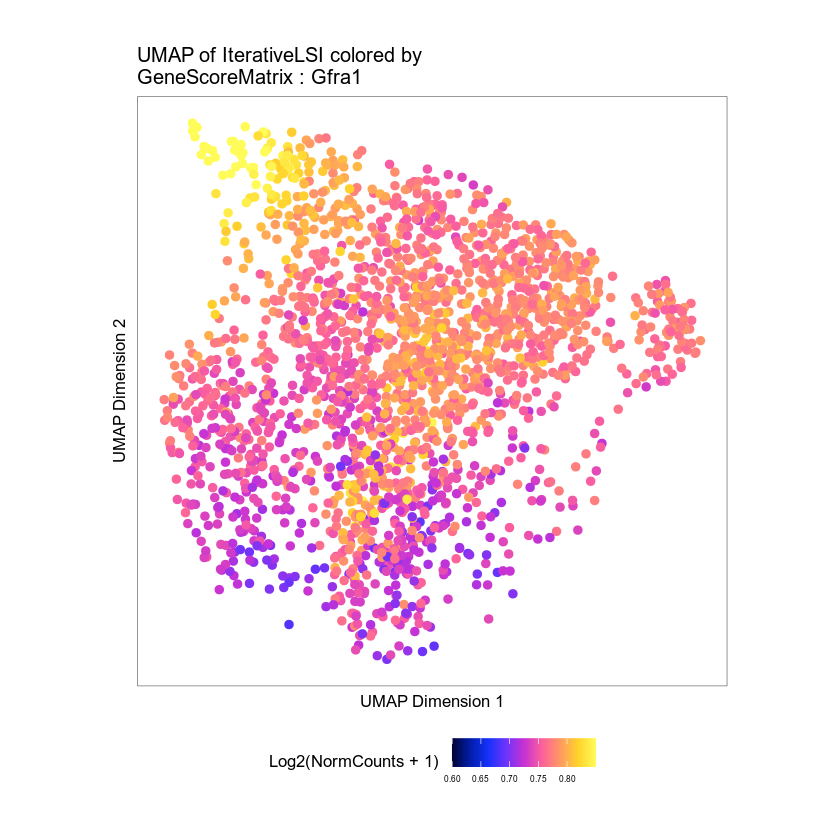

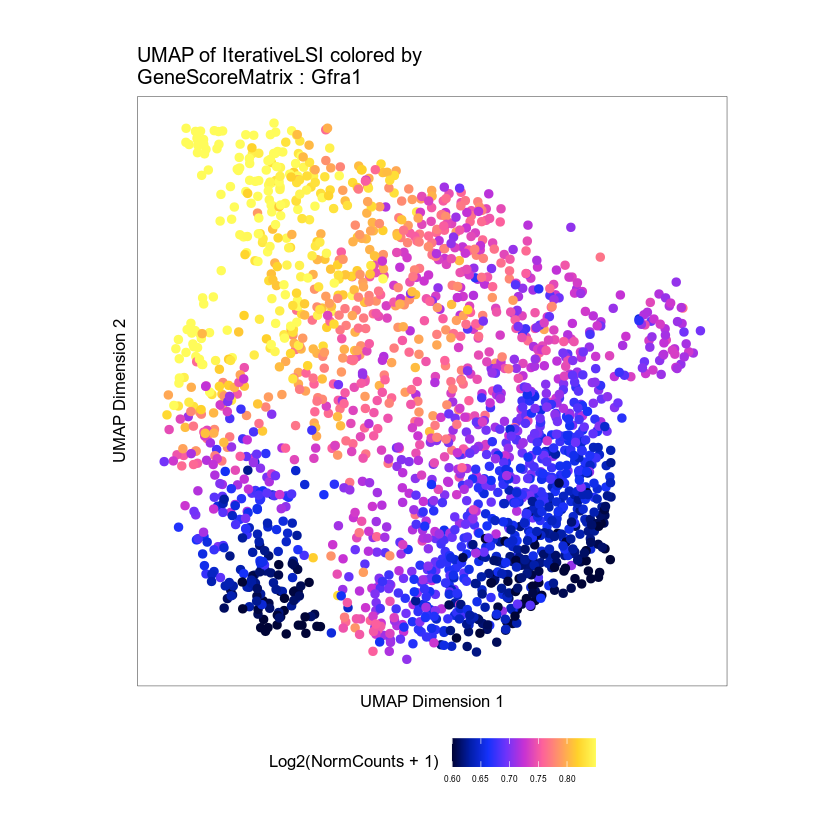

In [82]:
#Gfra1

p1 <- plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "GeneScoreMatrix", 
    name = c("Gfra1"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.CTRL),
     quantCut = c(0, 1),
    colorLimit =c(0.6,0.85)
    )

p2  <-plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "GeneScoreMatrix", 
    name = c("Gfra1"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0.6,0.85)
    )
# pdf(file = "CTRLvRA.Plppr3.sep.pdf")
p1
p2
# dev.off()

In [369]:

p1 <- plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "GeneScoreMatrix", 
    name = c("Cyp26a1"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.CTRL),
     quantCut = c(0, 1),
    colorLimit =c(0.6,0.85)
    )

p2  <-plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "GeneScoreMatrix", 
    name = c("Cyp26a1"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0.6,0.85)
    )
pdf(file = "CTRLvRA.Cyp26a1.sep.pdf")
p1
p2
dev.off()

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f95d325b34-Date-2021-11-17_Time-11-37-27.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-11-17 11:37:27 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f95d325b34-Date-2021-11-17_Time-11-37-27.log

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f98955378-Date-2021-11-17_Time-11-37-28.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-11-17 11:37:28 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f98955378-Date-2021-11-17_Time-11-37-28.log



png 
  2

In [366]:

p1 <- plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "GeneScoreMatrix", 
    name = c("Rxra"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.CTRL),
     quantCut = c(0, 1),
    colorLimit =c(1,1.5)
    )

p2  <-plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "GeneScoreMatrix", 
    name = c("Rxra"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(1,1.5)
    )
pdf(file = "CTRLvRA.Rxra.sep.pdf")
p1
p2
dev.off()

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f9389511b5-Date-2021-11-17_Time-11-35-02.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-11-17 11:35:02 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f9389511b5-Date-2021-11-17_Time-11-35-02.log

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f96c47e5b8-Date-2021-11-17_Time-11-35-04.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-11-17 11:35:04 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f96c47e5b8-Date-2021-11-17_Time-11-35-04.log



png 
  2

In [186]:

p1 <- plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "GeneScoreMatrix", 
    name = c("Kit"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.CTRL),
     quantCut = c(0, 1),
    colorLimit =c(0.6,0.8)
    )

p2  <-plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "GeneScoreMatrix", 
    name = c("Kit"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0.6,0.8)
    )
pdf(file = "CTRLvRA.Kit.sep.pdf")
p1
p2
dev.off()

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f919acf84d-Date-2021-10-18_Time-12-49-17.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-10-18 12:49:17 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f919acf84d-Date-2021-10-18_Time-12-49-17.log

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f9295ad662-Date-2021-10-18_Time-12-49-18.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-10-18 12:49:18 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f9295ad662-Date-2021-10-18_Time-12-49-18.log



png 
  2

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f92b6e3653-Date-2021-10-26_Time-10-59-43.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-10-26 10:59:43 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f92b6e3653-Date-2021-10-26_Time-10-59-43.log

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f9453b4dd-Date-2021-10-26_Time-10-59-44.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-10-26 10:59:44 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f9453b4dd-Date-2021-10-26_Time-10-59-44.log



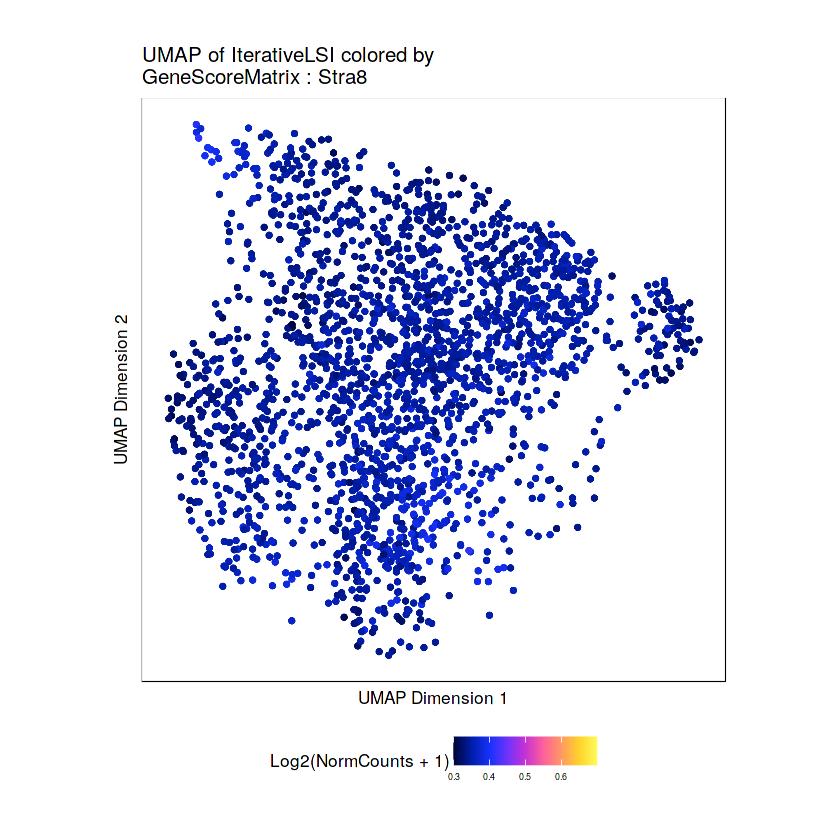

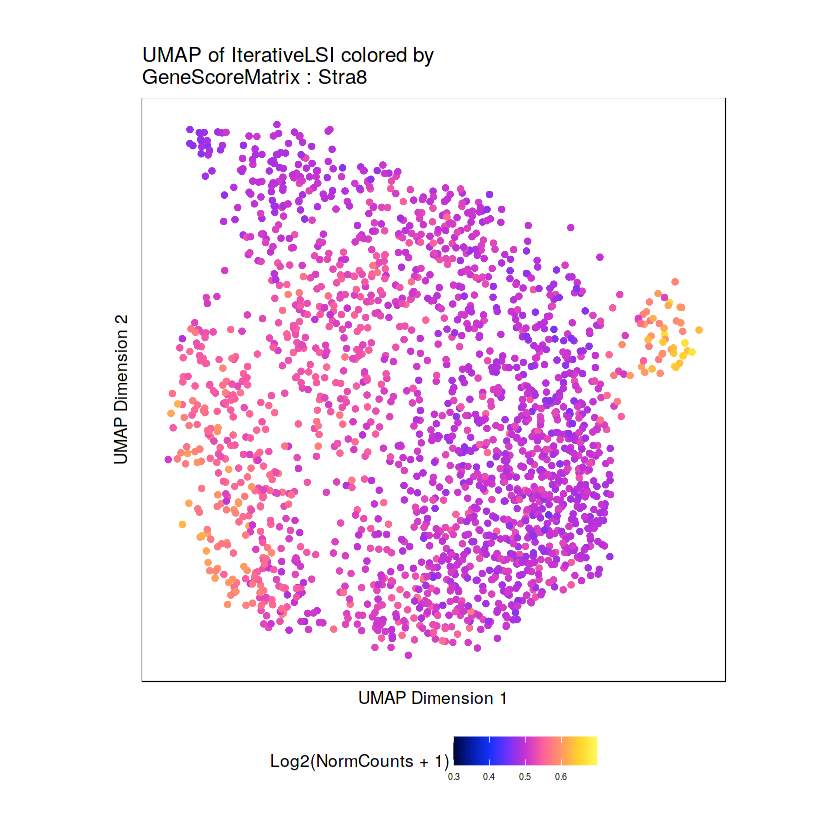

In [218]:
p1 <- plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "GeneScoreMatrix", 
    name = c("Stra8"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.CTRL),
     quantCut = c(0, 1),
    colorLimit =c(0.3,0.7)
    )

p2 <- plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "GeneScoreMatrix", 
    name = c("Stra8"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0.3,0.7)
    )
p1
p2

In [219]:
p1 <- plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "GeneScoreMatrix", 
    name = c("Stra8"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.CTRL),
     quantCut = c(0, 1),
    colorLimit =c(0.3,0.7)
    )

p2 <- plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "GeneScoreMatrix", 
    name = c("Stra8"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0.3,0.7)
    )
pdf(file = "CTRLvRA.Stra8.sep.pdf")
p1
p2
dev.off()

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f915cc1a8f-Date-2021-10-26_Time-11-00-19.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-10-26 11:00:19 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f915cc1a8f-Date-2021-10-26_Time-11-00-19.log

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f926b0353-Date-2021-10-26_Time-11-00-20.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-10-26 11:00:20 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f926b0353-Date-2021-10-26_Time-11-00-20.log



png 
  2

In [187]:
p1 <- plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "GeneScoreMatrix", 
    name = c("Stra8"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.CTRL),
     quantCut = c(0, 1),
    colorLimit =c(0.45,0.7)
    )

p2 <- plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "GeneScoreMatrix", 
    name = c("Stra8"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0.45,0.7)
    )
# pdf(file = "CTRLvRA.Stra8.sep.pdf")
# p1
# p2
# dev.off()

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f95a16b158-Date-2021-10-18_Time-12-50-21.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-10-18 12:50:21 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f95a16b158-Date-2021-10-18_Time-12-50-21.log

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f93db96b34-Date-2021-10-18_Time-12-50-22.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-10-18 12:50:22 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f93db96b34-Date-2021-10-18_Time-12-50-22.log



png 
  2

In [ ]:
p1 <- plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "GeneScoreMatrix", 
    name = c("Stra8"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.CTRL),
     quantCut = c(0, 1),
    colorLimit =c(0.45,0.7)
    )

p2 <- plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "GeneScoreMatrix", 
    name = c("Stra8"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0.45,0.7)
    )
pdf(file = "CTRLvRA.Stra8.sep.pdf")
p1
p2
dev.off()c

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f91d3e10cc-Date-2021-10-15_Time-16-57-29.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-10-15 16:57:30 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f91d3e10cc-Date-2021-10-15_Time-16-57-29.log

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f94b11ea63-Date-2021-10-15_Time-16-57-31.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-10-15 16:57:31 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f94b11ea63-Date-2021-10-15_Time-16-57-31.log



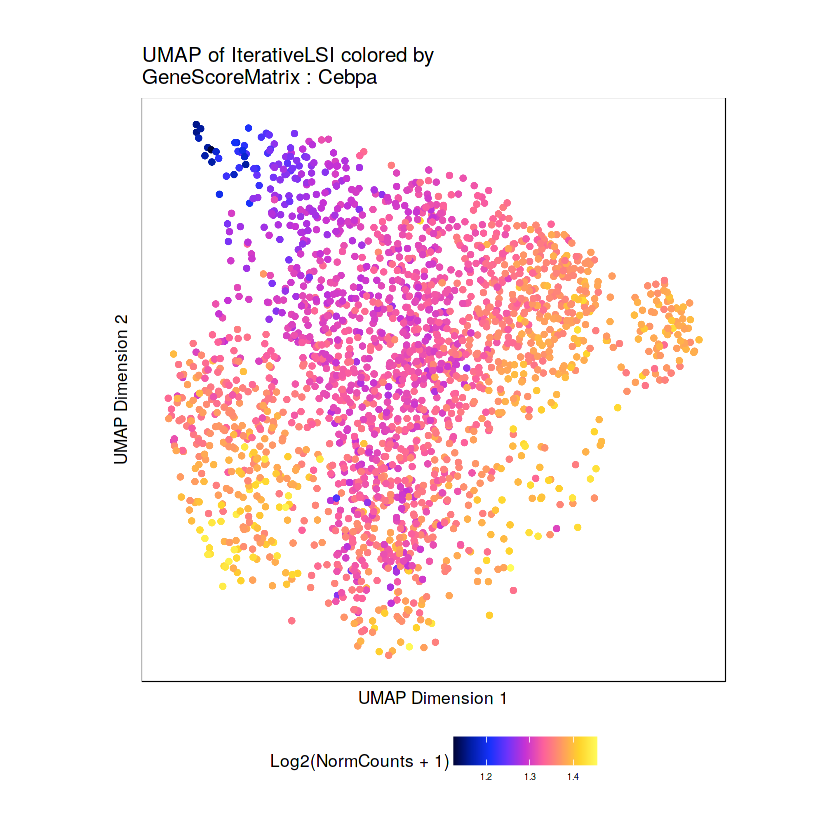

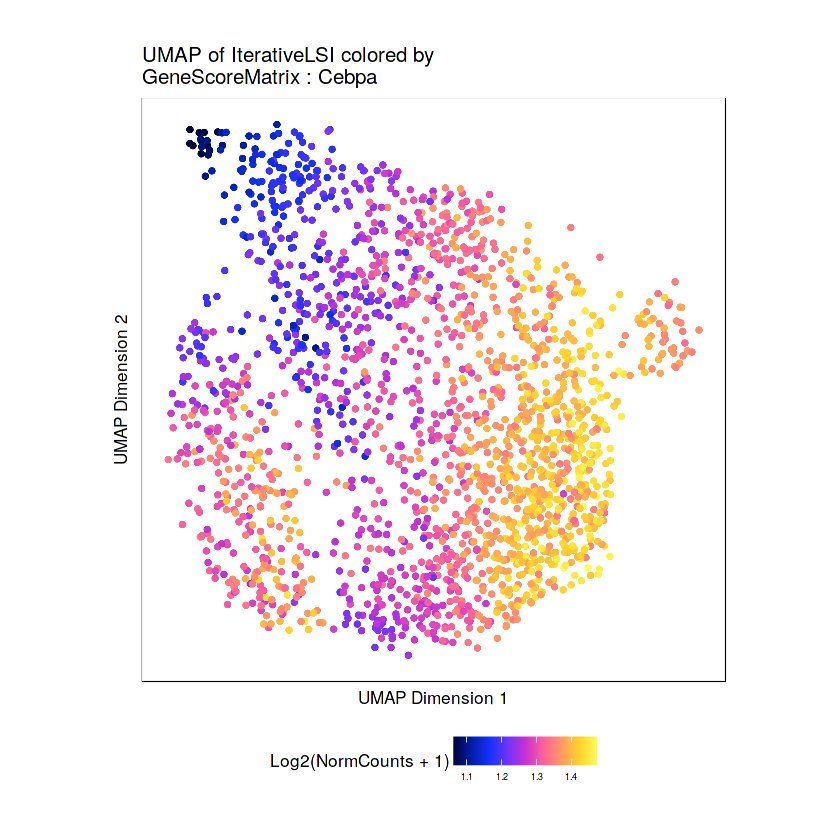

In [184]:
plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "GeneScoreMatrix", 
    name = c("Cebpa"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.CTRL),
     quantCut = c(0, 1),
#     colorLimit =c(0.45,0.7)
    )

plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "GeneScoreMatrix", 
    name = c("Cebpa"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
#     colorLimit =c(0.45,0.7)
    )

## Trajectoy analysis

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotTrajectory-4d117e035737-Date-2021-02-23_Time-12-34-29.log
If there is an issue, please report to github with logFile!

Getting Matrix Values...

2021-02-23 12:34:30 : 

1 
2 


Imputing Matrix

Using weights on disk

1 of 1

Plotting

Warning message:
“Removed 1522 rows containing non-finite values (stat_summary_hex).”
Plotting Trajectory

Adding Inferred Arrow Trajectory to Plot

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectory-4d117e035737-Date-2021-02-23_Time-12-34-29.log

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotTrajectory-4d1159e0b2e6-Date-2021-02-23_Time-12-34-31.log
If there is an issue, please report to github with logFile!

Getting Matrix Values...

2021-02-23 12:34:31 : 

1 
2 


Imputing Matrix

Using weights on disk

1 of 1

Plotting

Warning message:
“Removed 1522 rows containing non-finite values (stat_summary_hex).”
Plotting Trajectory

Adding Inferred Arrow Trajectory to Plot


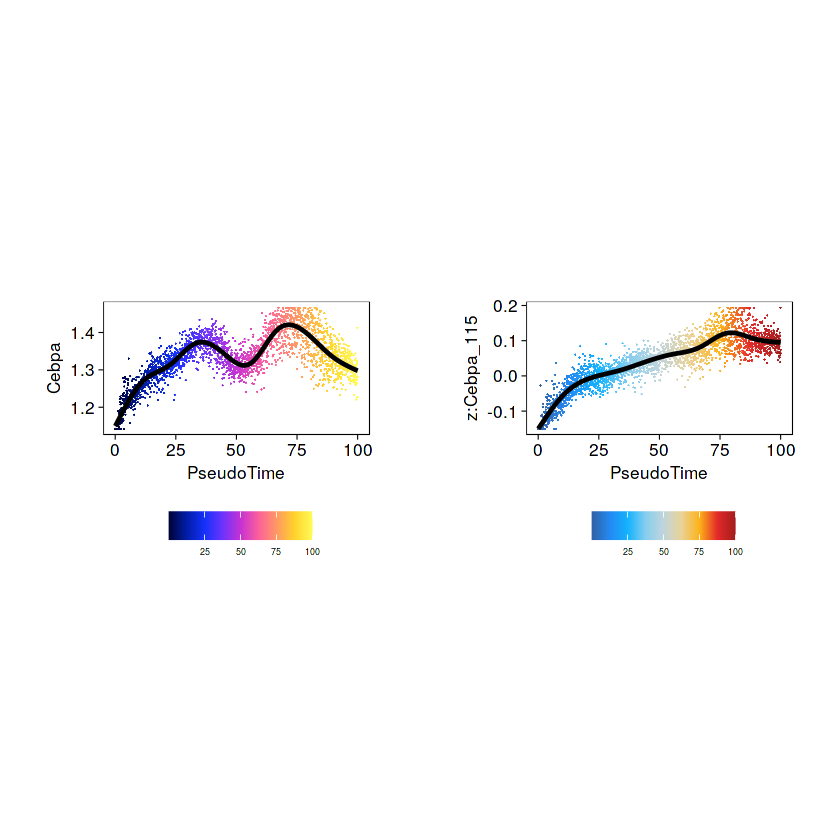

In [58]:
p1 <- plotTrajectory(Merged.proj2, trajectory = "Major_trajectory", colorBy = "GeneScoreMatrix", name = "Cebpa", continuousSet = "horizonExtra")
p2 <- plotTrajectory(Merged.proj2, trajectory = "Major_trajectory", colorBy = "MotifMatrix", name = "z:Cebpa_115", continuousSet = "solarExtra")
ggAlignPlots(p1[[2]], p2[[2]], type = "h")

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotTrajectory-4d117e035737-Date-2021-02-23_Time-12-34-29.log
If there is an issue, please report to github with logFile!

Getting Matrix Values...

2021-02-23 12:34:30 : 

1 
2 


Imputing Matrix

Using weights on disk

1 of 1

Plotting

Warning message:
“Removed 1522 rows containing non-finite values (stat_summary_hex).”
Plotting Trajectory

Adding Inferred Arrow Trajectory to Plot

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectory-4d117e035737-Date-2021-02-23_Time-12-34-29.log

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotTrajectory-4d1159e0b2e6-Date-2021-02-23_Time-12-34-31.log
If there is an issue, please report to github with logFile!

Getting Matrix Values...

2021-02-23 12:34:31 : 

1 
2 


Imputing Matrix

Using weights on disk

1 of 1

Plotting

Warning message:
“Removed 1522 rows containing non-finite values (stat_summary_hex).”
Plotting Trajectory

Adding Inferred Arrow Trajectory to Plot


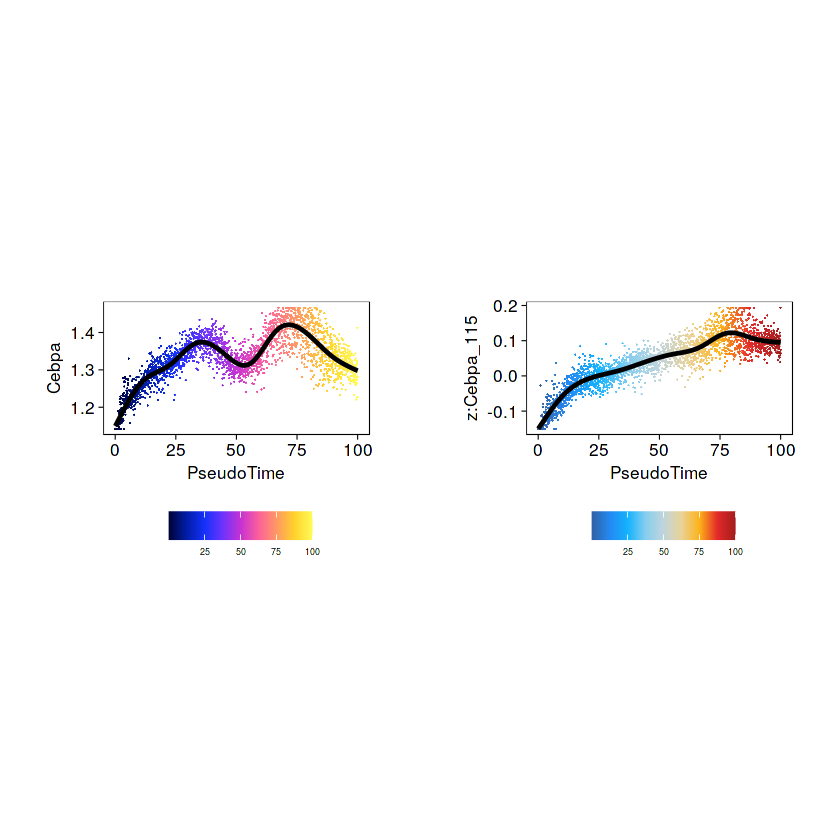

In [58]:
p1 <- plotTrajectory(Merged.proj2, trajectory = "Major_trajectory", colorBy = "GeneScoreMatrix", name = "Cebpa", continuousSet = "horizonExtra")
p2 <- plotTrajectory(Merged.proj2, trajectory = "Major_trajectory", colorBy = "MotifMatrix", name = "z:Cebpa_115", continuousSet = "solarExtra")
ggAlignPlots(p1[[2]], p2[[2]], type = "h")

In [218]:
#integration
corGSM_MM <- correlateTrajectories(trajGSM, trajMM,corCutOff = 0.2,varCutOff1=0.5,varCutOff2=0.5)
trajGSM2 <- trajGSM[corGSM_MM[[1]]$name1, ]
trajMM2 <- trajMM[corGSM_MM[[1]]$name2, ]

trajCombined <- trajGSM2
assay(trajCombined) <- t(apply(assay(
    trajGSM2), 1, scale)) + t(apply(assay(trajMM2), 1, scale))

combinedMat <- plotTrajectoryHeatmap(trajCombined, returnMat = TRUE, varCutOff = 0)
rowOrder <- match(rownames(combinedMat), rownames(trajGSM2))
ht1 <- plotTrajectoryHeatmap(trajGSM2,  pal = paletteContinuous(set = "horizonExtra"),  varCutOff = 0, rowOrder = rowOrder)
ht2 <- plotTrajectoryHeatmap(trajMM2, pal = paletteContinuous(set = "solarExtra"), varCutOff = 0, rowOrder = rowOrder)
ht1 + ht2

ArchR logging to : ArchRLogs/ArchR-correlateTrajectories-3dbc1f164e58-Date-2020-12-17_Time-12-35-45.log
If there is an issue, please report to github with logFile!

Found 95 Correlated Pairings!

2020-12-17 12:35:58 : 

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-3dbc970e193-Date-2020-12-17_Time-12-35-58.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-3dbc970e193-Date-2020-12-17_Time-12-35-58.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-3dbc36ff50dc-Date-2020-12-17_Time-12-35-58.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-3dbc36ff50dc-Date-2020-12-17_Time-12-35-58.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-3dbc3036d0eb-Date-2020-12-17_Time-12-35-58.log
If there is an issue, please report to github with logFile!

use

In [219]:
# plot heatmap
pdf("RA.traj.combine.pdf", width=5, height=10)
#options(repr.plot.height=20,repr.plot.width=8)
ComplexHeatmap::draw(ht1 + ht2, heatmap_legend_side = "bot", annotation_legend_side = "bot")
dev.off()

png 
  2

In [142]:
seGroupMotif <- getGroupSE(ArchRProj = Merged.proj2, useMatrix = "MotifMatrix", groupBy = "Seurat.Clusters")
seGroupMotif

ArchR logging to : ArchRLogs/ArchR-getGroupSE-3dbc24f2ecc4-Date-2020-12-16_Time-12-16-38.log
If there is an issue, please report to github with logFile!

Getting Group Matrix

2020-12-16 12:16:39 : Constructing Group Matrix 1 of 2, 0 mins elapsed.

2020-12-16 12:16:40 : Finished Group Matrix 1 of 2, 0.03 mins elapsed.

2020-12-16 12:16:40 : Constructing Group Matrix 2 of 2, 0.03 mins elapsed.

2020-12-16 12:16:42 : Finished Group Matrix 2 of 2, 0.052 mins elapsed.

2020-12-16 12:16:42 : Successfully Created Group Matrix, 0.052 mins elapsed.

Normalizing by number of Cells

ArchR logging successful to : ArchRLogs/ArchR-getGroupSE-3dbc24f2ecc4-Date-2020-12-16_Time-12-16-38.log



class: SummarizedExperiment 
dim: 1768 6 
metadata(0):
assays(1): MotifMatrix
rownames(1768): f1 f2 ... f1767 f1768
rowData names(3): seqnames idx name
colnames(6): C1 C2 ... C5 C6
colData names(31): TSSEnrichment ReadsInTSS ... ReadsInPeaks nCells

In [143]:
seZ <- seGroupMotif[rowData(seGroupMotif)$seqnames=="z",]
rowData(seZ)$maxDelta <- lapply(seq_len(ncol(seZ)), function(x){
  rowMaxs(assay(seZ) - assay(seZ)[,x])
}) %>% Reduce("cbind", .) %>% rowMaxs

In [144]:
corGSM_MM <- correlateMatrices(
    ArchRProj = Merged.proj2,
    useMatrix1 = "GeneScoreMatrix",
    useMatrix2 = "MotifMatrix",
    reducedDims = "IterativeLSI"
)
corGSM_MM

ArchR logging to : ArchRLogs/ArchR-correlateMatrices-3dbc6f3de032-Date-2020-12-16_Time-12-17-29.log
If there is an issue, please report to github with logFile!

When accessing features from a matrix of class Sparse.Assays.Matrix it requires 1 seqname!
Continuing with first seqname 'z'!
If confused, try getFeatures(ArchRProj, 'MotifMatrix') to list out available seqnames for input!

2020-12-16 12:17:29 : Testing 791 Mappings!, 0.014 mins elapsed.

2020-12-16 12:17:29 : Computing KNN, 0.014 mins elapsed.

2020-12-16 12:17:30 : Identifying Non-Overlapping KNN pairs, 0.015 mins elapsed.

2020-12-16 12:17:31 : Identified 495 Groupings!, 0.045 mins elapsed.

2020-12-16 12:17:32 : Getting Group Matrix 1, 0.053 mins elapsed.

2020-12-16 12:17:56 : Getting Group Matrix 2, 0.45 mins elapsed.

Some entries in groupMat2 are less than 0, continuing without Log2 Normalization.
Most likely this assay is a deviations matrix.

Getting Correlations...

2020-12-16 12:18:00 : 

Computing Correlation (250 

DataFrame with 791 rows and 14 columns
    GeneScoreMatrix_name MotifMatrix_name                 cor
                 <array>          <array>           <numeric>
1                  Sox17        Sox17_733  0.0797098880504578
2                  Mybl1        Mybl1_647   0.208706383105833
3                    Msc           Msc_43   0.304515773822116
4                 Arid5a         Arid5a_9  -0.259377225316372
5                  Npas2         Npas2_44  0.0933529088823853
...                  ...              ...                 ...
787                  Hdx          Hdx_495  -0.177524974201648
788               Zfp711       Zfp711_168  -0.122966607721691
789                 Esx1         Esx1_444 -0.0958213533343815
790                 Klf8         Klf8_194  0.0440478097842635
791               Mbtps2       Mbtps2_813   0.160016553566164
                    padj                 pval GeneScoreMatrix_seqnames
               <numeric>            <numeric>                    <Rle>
1            

[1] "Klf16" "Sp1"

Warning message:
“Removed 6 rows containing missing values (geom_point).”


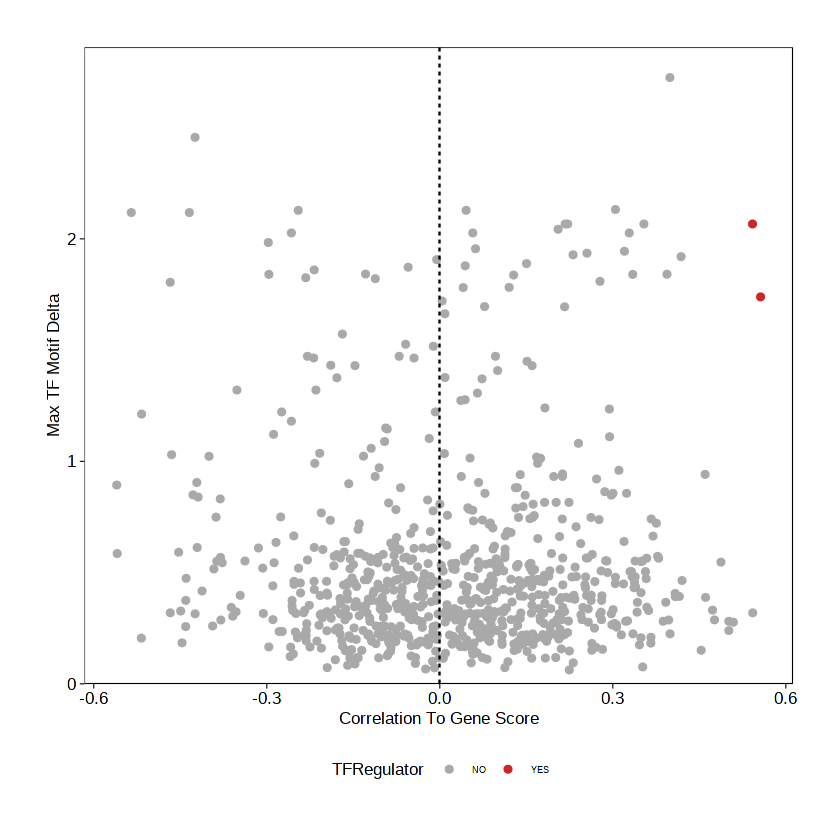

In [145]:
corGSM_MM$maxDelta <- rowData(seZ)[match(corGSM_MM$MotifMatrix_name, rowData(seZ)$name), "maxDelta"]
corGSM_MM <- corGSM_MM[order(abs(corGSM_MM$cor), decreasing = TRUE), ]
corGSM_MM <- corGSM_MM[which(!duplicated(gsub("\\-.*","",corGSM_MM[,"MotifMatrix_name"]))), ]
corGSM_MM$TFRegulator <- "NO"
corGSM_MM$TFRegulator[which(corGSM_MM$cor > 0.5 & corGSM_MM$padj < 0.01 & corGSM_MM$maxDelta > quantile(corGSM_MM$maxDelta, 0.75))] <- "YES"
sort(corGSM_MM[corGSM_MM$TFRegulator=="YES",1])

p <- ggplot(data.frame(corGSM_MM), aes(cor, maxDelta, color = TFRegulator)) +
  geom_point() + 
  theme_ArchR() +
  geom_vline(xintercept = 0, lty = "dashed") + 
  scale_color_manual(values = c("NO"="darkgrey", "YES"="firebrick3")) +
  xlab("Correlation To Gene Score") +
  ylab("Max TF Motif Delta") +
  scale_y_continuous(
    expand = c(0,0), 
    limits = c(0, max(corGSM_MM$maxDelta)*1.05)
  )

p

In [41]:
Major.trajectory <- c("C2", "C5", "C6")
Merged.proj2 <- addTrajectory(
    ArchRProj = Merged.proj2, 
    name = "Major_trajectory", 
    groupBy = "Seurat.Clusters",
    trajectory = Major.trajectory, 
    embedding = "UMAP", 
    force = TRUE
)

Minor.trajectory <- c("C2", "C3","C5", "C4", "C6")
Merged.proj2 <- addTrajectory(
    ArchRProj = Merged.proj2, 
    name = "Minor_trajectory", 
    groupBy = "Seurat.Clusters",
    trajectory = Minor.trajectory, 
    embedding = "UMAP", 
    force = TRUE
)

ArchR logging to : ArchRLogs/ArchR-addTrajectory-ea61364a2cc2-Date-2022-11-08_Time-13-49-38.log
If there is an issue, please report to github with logFile!

Filtering outliers

Initial Alignment Before Spline Fit

Spline Fit

KNN to Spline

Overriding previous entry for Major_trajectory

ArchR logging successful to : ArchRLogs/ArchR-addTrajectory-ea61364a2cc2-Date-2022-11-08_Time-13-49-38.log

ArchR logging to : ArchRLogs/ArchR-addTrajectory-ea617b9bd015-Date-2022-11-08_Time-13-49-39.log
If there is an issue, please report to github with logFile!

Filtering outliers

Initial Alignment Before Spline Fit

Spline Fit

KNN to Spline

Overriding previous entry for Minor_trajectory

ArchR logging successful to : ArchRLogs/ArchR-addTrajectory-ea617b9bd015-Date-2022-11-08_Time-13-49-39.log



ArchR logging to : ArchRLogs/ArchR-plotTrajectory-ea612e2b601a-Date-2022-11-08_Time-13-49-41.log
If there is an issue, please report to github with logFile!

Plotting


Warning message:
“Removed 537 rows containing non-finite values (stat_summary_hex).”
Plotting Trajectory


Adding Inferred Arrow Trajectory to Plot

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectory-ea612e2b601a-Date-2022-11-08_Time-13-49-41.log

Warning message:
“Removed 537 rows containing non-finite values (stat_summary_hex).”


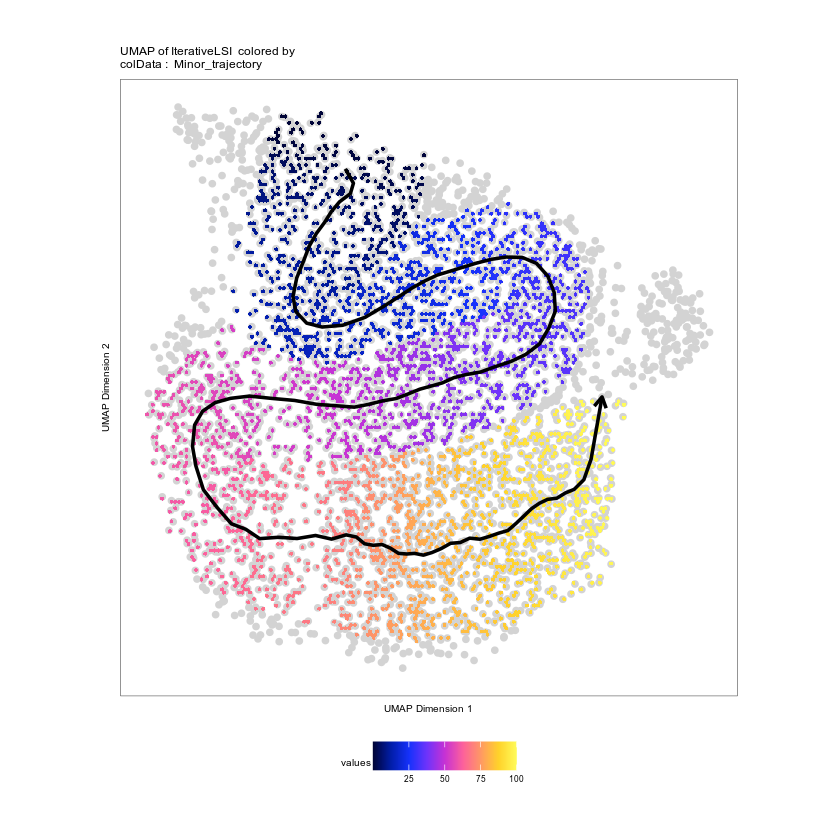

In [42]:
p <- plotTrajectory(Merged.proj2, trajectory = "Minor_trajectory", colorBy = "cellColData", name = "Minor_trajectory")
p[[1]]

Creating Trajectory Group Matrix..

Some values are below 0, this could be a DeviationsMatrix in which scaleTo should be set = NULL.
Continuing without depth normalization!

Smoothing...

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-4d966c7ba89-Date-2021-08-16_Time-14-46-40.log
If there is an issue, please report to github with logFile!

useSeqnames is NULL or greater than 1 with a Sparse.Assays.Matrix trajectory input.

2021-08-16 14:46:40 : 

force=FALSE thus continuing with subsetting useSeqnames = z

2021-08-16 14:46:40 : 

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-4d966c7ba89-Date-2021-08-16_Time-14-46-40.log



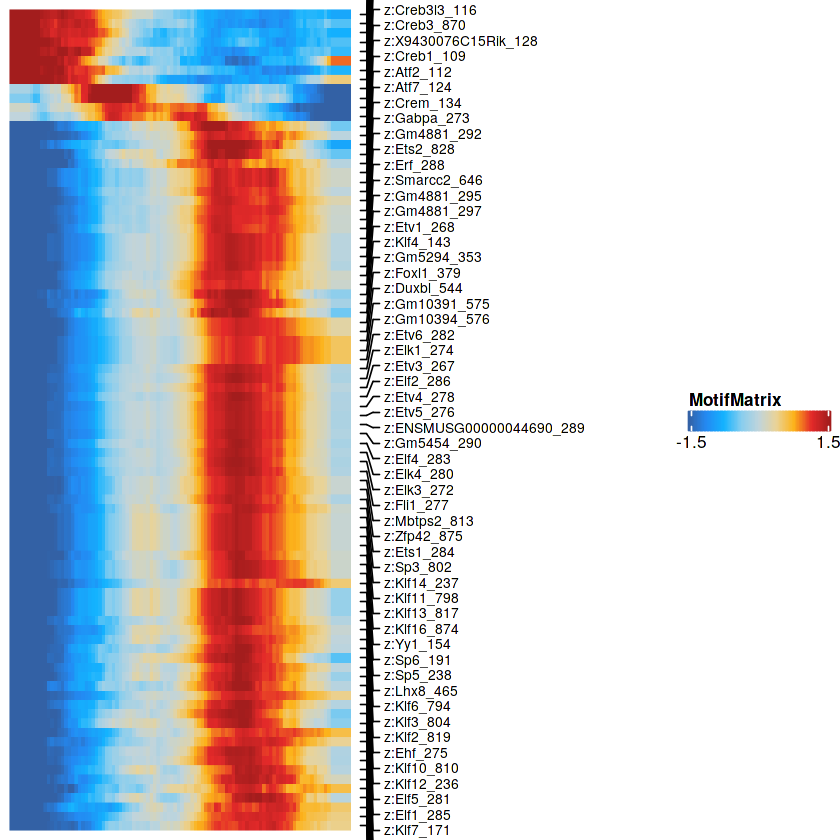

In [27]:
trajMM  <- getTrajectory(ArchRProj = Merged.proj2, name = "Minor_trajectory", useMatrix = "MotifMatrix", log2Norm = FALSE)
p1 <- plotTrajectoryHeatmap(trajMM, pal = paletteContinuous(set = "solarExtra"),labelTop = 100)
p1

Creating Trajectory Group Matrix..

Smoothing...

Warning message:
“'trajectoryHeatmap' is deprecated.
Use 'plotTrajectoryHeatmap' instead.
See help("Deprecated")”
ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-4d9643fabb3c-Date-2021-08-16_Time-14-47-08.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-4d9643fabb3c-Date-2021-08-16_Time-14-47-08.log



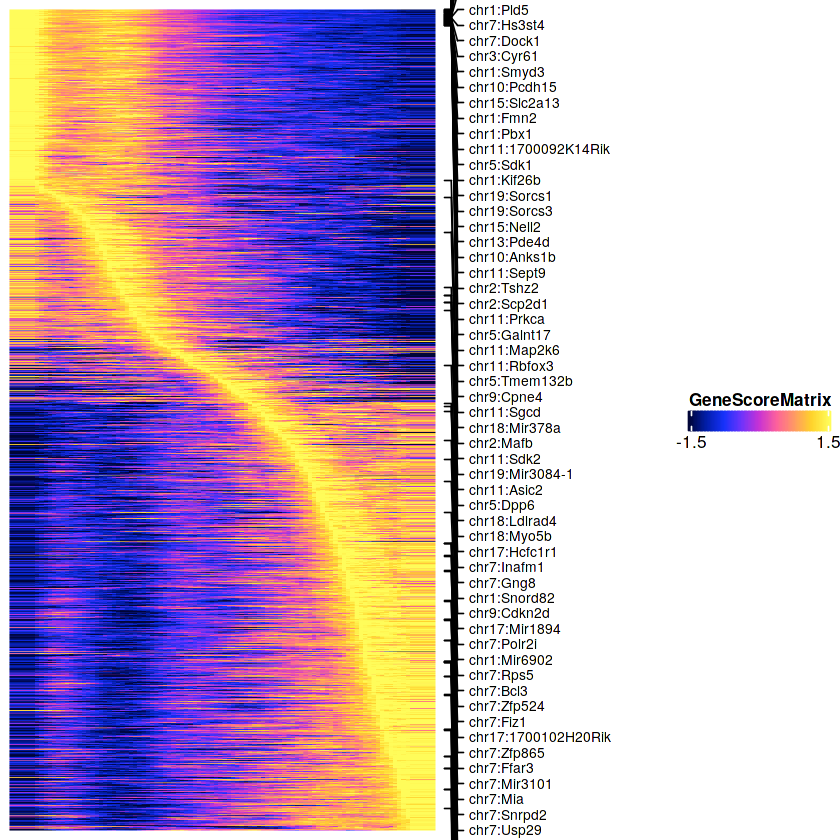

In [28]:
trajGSM <- getTrajectory(ArchRProj = Merged.proj2, name = "Minor_trajectory", useMatrix = "GeneScoreMatrix", log2Norm = TRUE)
p2 <- trajectoryHeatmap(trajGSM,  pal = paletteContinuous(set = "horizonExtra"),labelTop = 100)
p2

In [16]:
trajectory <- c("3", "4", "1")

In [20]:
Merged.proj2 <- addTrajectory(
    ArchRProj = Merged.proj2, 
    name = "EMT", 
    groupBy = "cluster",
    trajectory = trajectory, 
    embedding = "UMAP", 
    force = TRUE
)

ArchR logging to : ArchRLogs/ArchR-addTrajectory-3b5710476644-Date-2020-05-02_Time-01-33-35.log
If there is an issue, please report to github with logFile!

Filtering outliers

Initial Alignment Before Spline Fit

Spline Fit

KNN to Spline

ArchR logging successful to : ArchRLogs/ArchR-addTrajectory-3b5710476644-Date-2020-05-02_Time-01-33-35.log



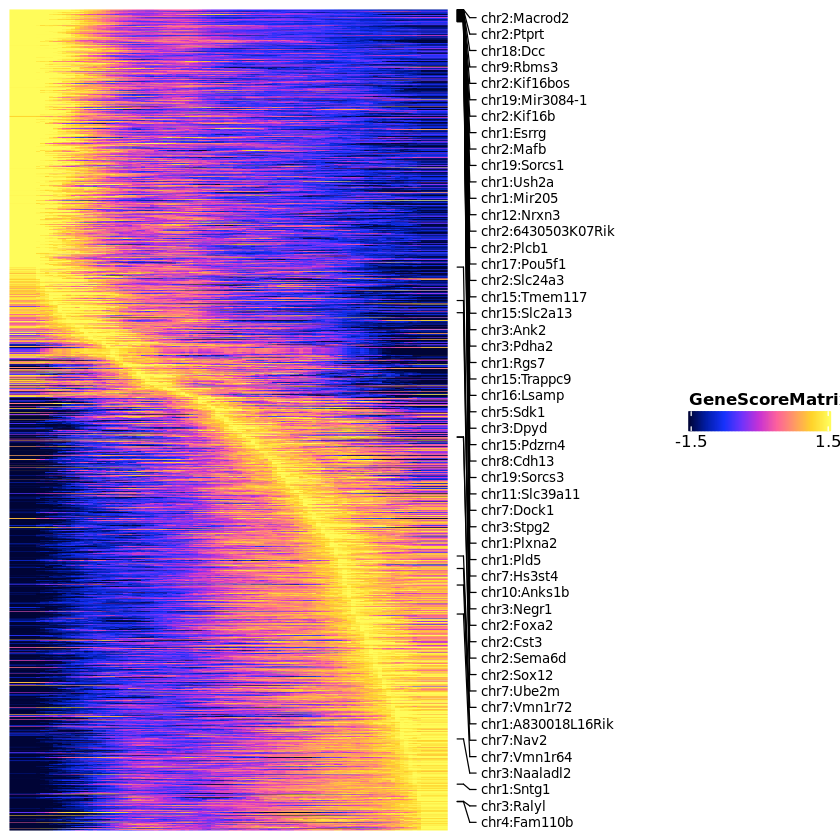

In [12]:
p2

In [14]:
if("Motif" %ni% names(Merged.proj2@peakAnnotation)){
    Merged.proj2 <- addMotifAnnotations(ArchRProj = Merged.proj2, motifSet = "cisbp", name = "Motif")
}

ArchR logging to : ArchRLogs/ArchR-addMotifAnnotations-3d773b774568-Date-2020-05-02_Time-01-51-34.log
If there is an issue, please report to github with logFile!

2020-05-02 01:51:34 : Gettting Motif Set, Species : Mus musculus, 0.002 mins elapsed.

Using version 2 motifs!

2020-05-02 01:51:35 : Finding Motif Positions with motifmatchr!, 0.025 mins elapsed.

2020-05-02 01:53:30 : Creating Motif Overlap Matrix, 1.939 mins elapsed.

2020-05-02 01:53:33 : Finished Getting Motif Info!, 1.982 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addMotifAnnotations-3d773b774568-Date-2020-05-02_Time-01-51-34.log



In [15]:
Merged.proj2 <- addBgdPeaks(Merged.proj2)

Identifying Background Peaks!



In [ ]:
Merged.proj2 <- addDeviationsMatrix(
  ArchRProj = Merged.proj2, 
  peakAnnotation = "Motif",
  force = TRUE
)


used     (Mb)  gc trigger (Mb)   max used  (Mb)  
Ncells  9834939 525.3  18436465   984.7  18436465  984.7
Vcells 28173264 215.0 147592521  1126.1 184483339 1407.5

Using Previous Background Peaks!

ArchR logging to : ArchRLogs/ArchR-addDeviationsMatrix-3d7750e46d8b-Date-2020-05-02_Time-01-53-42.log
If there is an issue, please report to github with logFile!



NULL


2020-05-02 01:53:45 : Batch Execution w/ safelapply!, 0 mins elapsed.



In [66]:
trajMM  <- getTrajectory(ArchRProj = Merged.proj2, name = "Major_trajectory", useMatrix = "MotifMatrix", log2Norm = FALSE)

Creating Trajectory Group Matrix..

Some values are below 0, this could be a DeviationsMatrix in which scaleTo should be set = NULL.
Continuing without depth normalization!

Smoothing...



In [67]:
p1 <- plotTrajectoryHeatmap(trajMM, pal = paletteContinuous(set = "solarExtra"))

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-4d113d46f8fa-Date-2021-02-23_Time-15-35-55.log
If there is an issue, please report to github with logFile!

useSeqnames is NULL or greater than 1 with a Sparse.Assays.Matrix trajectory input.

2021-02-23 15:35:55 : 

force=FALSE thus continuing with subsetting useSeqnames = z

2021-02-23 15:35:55 : 

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-4d113d46f8fa-Date-2021-02-23_Time-15-35-55.log



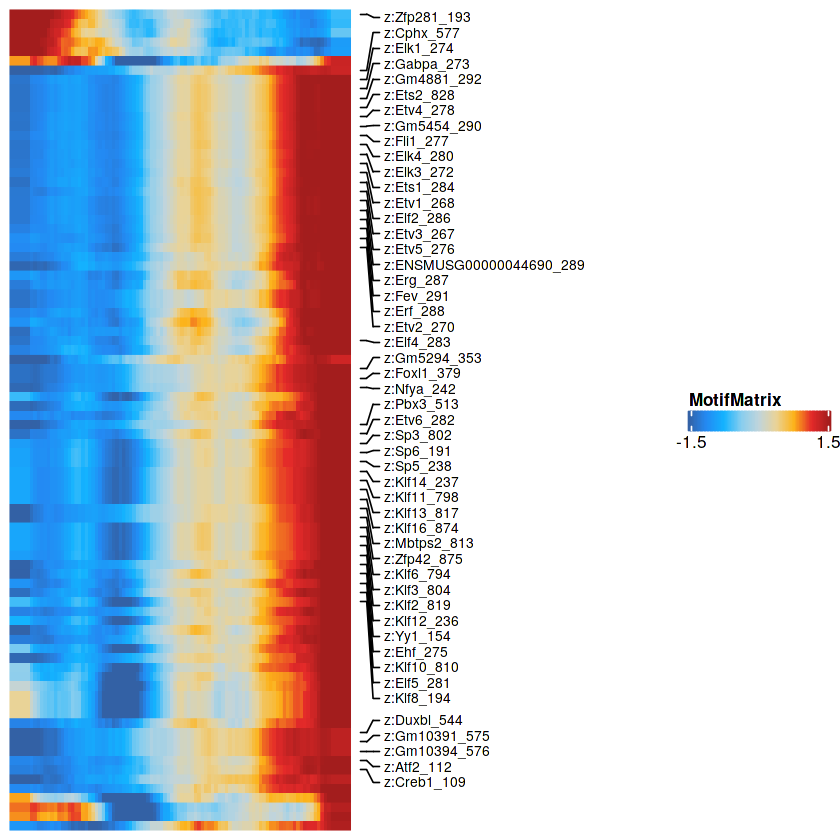

In [68]:
p1

In [8]:
trajPM  <- getTrajectory(ArchRProj = Merged.proj2, name = "EMT", useMatrix = "PeakMatrix", log2Norm = TRUE)

Creating Trajectory Group Matrix..

Smoothing...



ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-40ba21bb6c16-Date-2020-05-02_Time-02-20-14.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-40ba21bb6c16-Date-2020-05-02_Time-02-20-14.log



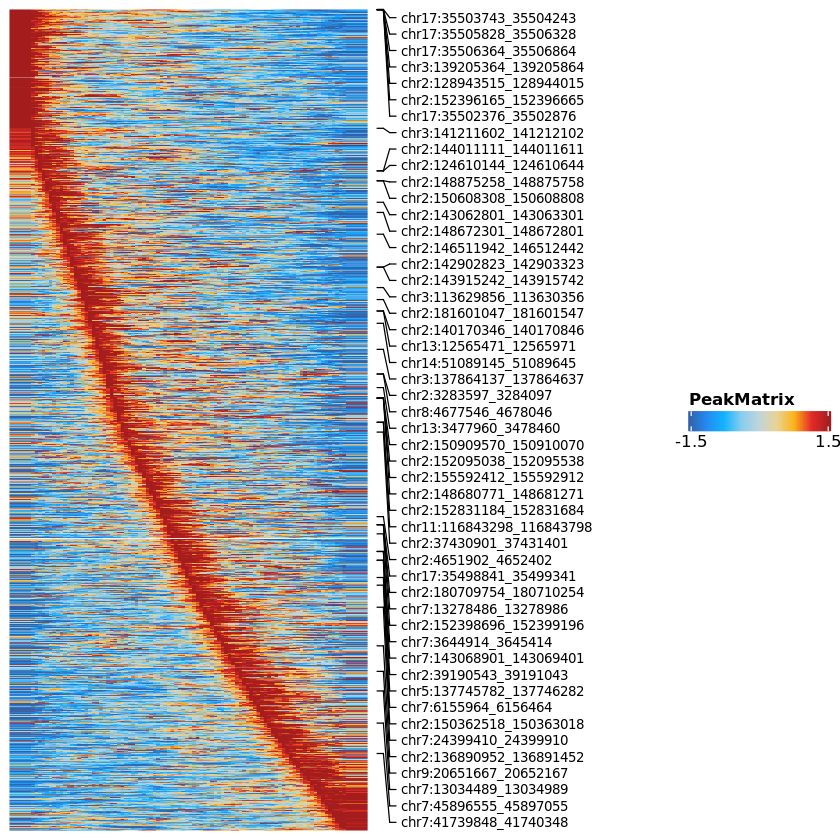

In [9]:
p4 <- plotTrajectoryHeatmap(trajPM, pal = paletteContinuous(set = "solarExtra"))
p4

In [35]:
corGSM_MM <- correlateTrajectories(trajGSM, trajMM,corCutOff = 0)

ArchR logging to : ArchRLogs/ArchR-correlateTrajectories-4d965c3c4a12-Date-2021-08-16_Time-15-03-18.log
If there is an issue, please report to github with logFile!

Found 97 Correlated Pairings!

2021-08-16 15:03:30 : 



In [37]:
trajGSM2 <- trajGSM[corGSM_MM[[1]]$name1, ]
trajMM2 <- trajMM[corGSM_MM[[1]]$name2, ]

In [39]:
trajCombined <- trajGSM2
assay(trajCombined) <- t(apply(assay(trajGSM2), 1, scale)) + t(apply(assay(trajMM2), 1, scale))

In [40]:
combinedMat <- plotTrajectoryHeatmap(trajCombined, returnMat = TRUE, varCutOff = 0)

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-4d963f8d79a6-Date-2021-08-16_Time-15-04-04.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-4d963f8d79a6-Date-2021-08-16_Time-15-04-04.log



In [41]:
rowOrder <- match(rownames(combinedMat), rownames(trajGSM2))

### Export to bigwig files

In [138]:
## export data
# extract cluster bigwig
#get cluster name
cluster.barcode <- data_frame(cellname = Merged.proj2$cellNames,cluster = Merged.proj2@cellColData$Seurat.Clusters,
                             sample = Merged.proj2$Sample)



write.table(cluster.barcode %>% filter(sample == "CTRL") %>% dplyr::select(cellname,cluster) %>% mutate(cellname = substr(cellname,6,50)),file="CTRL.cluster.cellbarcode.sinto.txt",quote = FALSE, sep = "\t",row.names = FALSE,
                 col.names = FALSE)
write.table(cluster.barcode %>% filter(sample == "RA") %>% dplyr::select(cellname,cluster) %>% mutate(cellname = substr(cellname,4,50)),file="RA.cluster.cellbarcode.sinto.txt",quote = FALSE, sep = "\t",row.names = FALSE,
                 col.names = FALSE)


write.table(cluster.barcode %>% filter(sample == "CTRL") %>% dplyr::select(cellname,sample) %>% mutate(cellname = substr(cellname,6,50)),file="CTRL.all.cellbarcode.sinto.txt",quote = FALSE, sep = "\t",row.names = FALSE,
                 col.names = FALSE)
write.table(cluster.barcode %>% filter(sample == "RA") %>% dplyr::select(cellname,sample) %>% mutate(cellname = substr(cellname,4,50)),file="RA.all.cellbarcode.sinto.txt",quote = FALSE, sep = "\t",row.names = FALSE,
                 col.names = FALSE)
#using sinto to get bam
#using bamcoverage

In [ ]:
mkdir CTRL
sinto filterbarcodes -b ~/CTRL/deconvoluted_data/final/alignments.possorted.tagged.bap.bam --barcodetag DB -c /home/leetl/CTRLvsRA-scATAC/CTRL.cluster.cellbarcode.sinto.txt -p 1 
sinto filterbarcodes -b ~/CTRL/deconvoluted_data/final/alignments.possorted.tagged.bap.bam --barcodetag DB -c /home/leetl/CTRLvsRA-scATAC/CTRL.all.cellbarcode.sinto.txt -p 1
mkdir RA
sinto filterbarcodes -b ~/RA/deconvoluted_data/final/alignments.possorted.tagged.bap.bam --barcodetag DB -c /home/leetl/CTRLvsRA-scATAC/RA.cluster.cellbarcode.sinto.txt -p 1
sinto filterbarcodes -b ~/RA/deconvoluted_data/final/alignments.possorted.tagged.bap.bam --barcodetag DB -c /home/leetl/CTRLvsRA-scATAC/RA.all.cellbarcode.sinto.txt -p 1


In [ ]:
samtools merge /home/leetl/CTRLvsRA-scATAC/genometrack/Cluster_merge/C1_merged.bam /home/leetl/CTRLvsRA-scATAC/genometrack/CTRL/C1.bam /home/leetl/CTRLvsRA-scATAC/genometrack/RA/C1.bam -f
samtools merge /home/leetl/CTRLvsRA-scATAC/genometrack/Cluster_merge/C2_merged.bam /home/leetl/CTRLvsRA-scATAC/genometrack/CTRL/C2.bam /home/leetl/CTRLvsRA-scATAC/genometrack/RA/C2.bam -f
samtools merge /home/leetl/CTRLvsRA-scATAC/genometrack/Cluster_merge/C3_merged.bam /home/leetl/CTRLvsRA-scATAC/genometrack/CTRL/C3.bam /home/leetl/CTRLvsRA-scATAC/genometrack/RA/C3.bam -f
samtools merge /home/leetl/CTRLvsRA-scATAC/genometrack/Cluster_merge/C4_merged.bam /home/leetl/CTRLvsRA-scATAC/genometrack/CTRL/C4.bam /home/leetl/CTRLvsRA-scATAC/genometrack/RA/C4.bam -f
samtools merge /home/leetl/CTRLvsRA-scATAC/genometrack/Cluster_merge/C5_merged.bam /home/leetl/CTRLvsRA-scATAC/genometrack/CTRL/C5.bam /home/leetl/CTRLvsRA-scATAC/genometrack/RA/C5.bam -f
samtools merge /home/leetl/CTRLvsRA-scATAC/genometrack/Cluster_merge/C6_merged.bam /home/leetl/CTRLvsRA-scATAC/genometrack/CTRL/C6.bam /home/leetl/CTRLvsRA-scATAC/genometrack/RA/C6.bam -f

samtools index Cluster_merge/C1_merged.bam
samtools index Cluster_merge/C2_merged.bam
samtools index Cluster_merge/C3_merged.bam
samtools index Cluster_merge/C4_merged.bam
samtools index Cluster_merge/C5_merged.bam
samtools index Cluster_merge/C6_merged.bam

samtools index CTRL/CTRL.bam
samtools index RA/RA.bam

#bamCoverage --bam /home/leetl/CTRLvsRA-scATAC/genometrack/CTRL/CTRL.bam  -o CTRL.bw --binSize 10 --normalizeUsing CPM --effectiveGenomeSize 2652783500 --ignoreForNormalization chrX --extendReads -p 10 --smoothLength 50
#bamCoverage --bam /home/leetl/CTRLvsRA-scATAC/genometrack/RA/RA.bam  -o RA.bw --binSize 10 --normalizeUsing CPM --effectiveGenomeSize 2652783500 --ignoreForNormalization chrX --extendReads -p 10 --smoothLength 50
#bamCoverage --bam /home/leetl/CTRLvsRA-scATAC/genometrack/Cluster_merge/C1_merged.bam  -o C1_merged.bw --binSize 10 --normalizeUsing CPM --effectiveGenomeSize 2652783500 --ignoreForNormalization chrX --extendReads -p 10 --smoothLength 50
bamCoverage --bam /home/leetl/CTRLvsRA-scATAC/genometrack/Cluster_merge/C2_merged.bam  -o C2_merged.bw --binSize 10 --normalizeUsing CPM --effectiveGenomeSize 2652783500 --ignoreForNormalization chrX --extendReads -p 10 --smoothLength 50
#bamCoverage --bam /home/leetl/CTRLvsRA-scATAC/genometrack/Cluster_merge/C3_merged.bam  -o C3_merged.bw --binSize 10 --normalizeUsing CPM --effectiveGenomeSize 2652783500 --ignoreForNormalization chrX --extendReads -p 10 --smoothLength 50
#bamCoverage --bam /home/leetl/CTRLvsRA-scATAC/genometrack/Cluster_merge/C4_merged.bam  -o C4_merged.bw --binSize 10 --normalizeUsing CPM --effectiveGenomeSize 2652783500 --ignoreForNormalization chrX --extendReads -p 10 --smoothLength 50
#bamCoverage --bam /home/leetl/CTRLvsRA-scATAC/genometrack/Cluster_merge/C5_merged.bam  -o C5_merged.bw --binSize 10 --normalizeUsing CPM --effectiveGenomeSize 2652783500 --ignoreForNormalization chrX --extendReads -p 10 --smoothLength 50
#bamCoverage --bam /home/leetl/CTRLvsRA-scATAC/genometrack/Cluster_merge/C6_merged.bam  -o C6_merged.bw --binSize 10 --normalizeUsing CPM --effectiveGenomeSize 2652783500 --ignoreForNormalization chrX --extendReads -p 10 --smoothLength 50


samtools index 
cd RA
samtools index C1.bam
samtools index C2.bam
samtools index C3.bam
samtools index C4.bam
samtools index C5.bam
samtools index C6.bam
bamCoverage --bam C1.bam  -o C1.bw --binSize 50 --normalizeUsing CPM --effectiveGenomeSize 2652783500 --ignoreForNormalization chrX --extendReads -p 10 --smoothLength 50
bamCoverage --bam C2.bam  -o C2.bw --binSize 50 --normalizeUsing CPM --effectiveGenomeSize 2652783500 --ignoreForNormalization chrX --extendReads -p 10 --smoothLength 50
bamCoverage --bam C3.bam  -o C3.bw --binSize 50 --normalizeUsing CPM --effectiveGenomeSize 2652783500 --ignoreForNormalization chrX --extendReads -p 10 --smoothLength 50
bamCoverage --bam C4.bam  -o C4.bw --binSize 50 --normalizeUsing CPM --effectiveGenomeSize 2652783500 --ignoreForNormalization chrX --extendReads -p 10 --smoothLength 50
bamCoverage --bam C5.bam  -o C5.bw --binSize 50 --normalizeUsing CPM --effectiveGenomeSize 2652783500 --ignoreForNormalization chrX --extendReads -p 10 --smoothLength 50
bamCoverage --bam C6.bam  -o C6.bw --binSize 50 --normalizeUsing CPM --effectiveGenomeSize 2652783500 --ignoreForNormalization chrX --extendReads -p 10 --smoothLength 50
cd ..
cd CTRL
samtools index C1.bam
samtools index C2.bam
samtools index C3.bam
samtools index C4.bam
samtools index C5.bam
samtools index C6.bam
# bamCoverage --bam C1.bam  -o C1.bw --binSize 50 --normalizeUsing CPM --effectiveGenomeSize 2652783500 --ignoreForNormalization chrX --extendReads -p 10 --smoothLength 50
bamCoverage --bam C2.bam  -o C2.bw --binSize 50 --normalizeUsing CPM --effectiveGenomeSize 2652783500 --ignoreForNormalization chrX --extendReads -p 10 --smoothLength 50
# bamCoverage --bam C3.bam  -o C3.bw --binSize 50 --normalizeUsing CPM --effectiveGenomeSize 2652783500 --ignoreForNormalization chrX --extendReads -p 10 --smoothLength 50
# bamCoverage --bam C4.bam  -o C4.bw --binSize 50 --normalizeUsing CPM --effectiveGenomeSize 2652783500 --ignoreForNormalization chrX --extendReads -p 10 --smoothLength 50
# bamCoverage --bam C5.bam  -o C5.bw --binSize 50 --normalizeUsing CPM --effectiveGenomeSize 2652783500 --ignoreForNormalization chrX --extendReads -p 10 --smoothLength 50
# bamCoverage --bam C6.bam  -o C6.bw --binSize 50 --normalizeUsing CPM --effectiveGenomeSize 2652783500 --ignoreForNormalization chrX --extendReads -p 10 --smoothLength 50



In [7]:
library(Seurat)
library(clusterProfiler)
sessionInfo()

Attaching SeuratObject

Attaching sp


Attaching package: ‘Seurat’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays




clusterProfiler v3.18.1  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:purrr’:

    simplify


The following object is masked from ‘package:IRanges’:

    slice


The following object is masked from ‘package:S4Vectors’:

    rename


The following objects are masked from ‘package:plyr’:

    arrange, mutate, rename, summarise


The following object is masked from ‘package:stats’:

    filter




R version 4.0.5 (2021-03-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /lustre/home/jasonliao/miniconda3/envs/seurat/lib/libopenblasp-r0.3.20.so

Random number generation:
 RNG:     L'Ecuyer-CMRG 
 Normal:  Inversion 
 Sample:  Rejection 
 
locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] parallel  stats4    grid      stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] clusterProfiler_3.18.1      sp_1.5-0                   
 [3] SeuratObject_4.1.2          Seurat_4.2.0               
 [5] here_1.0.1                  forca